<div class="alert alert-block alert-info">
    <b>Projet 2 | Analysez des données de systèmes éducatifs</b>
</div>

# A | Énoncé

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :<br>
<br>
-  Quels sont les pays avec un fort potentiel de clients pour nos services ?<br>
-  Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?<br>
-  Dans quels pays l'entreprise doit-elle opérer en priorité ?

# B | Mission

Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello,

Les données de la Banque mondiale sont disponibles à l’adresse suivante :

https://datacatalog.worldbank.org/dataset/education-statistics

Ou en téléchargement direct à ce lien.

Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :

http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

-  Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)<br>
-  Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)<br>
-  Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)<br>
-  Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)<br>

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. 
<br>
On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

# C | Livrables attendus

-  Un notebook comportant les analyses pré-exploratoires réalisées (non cleané, pour comprendre votre démarche).
-  Un support de présentation pour la soutenance.

# D | Import des packages et fonctions nécessaires

## D.1 Vérification de la version de Python installée

In [1]:
!python -V

Python 3.7.0


## D.2 Installation des packages nécessaires et vérification de la version

Création d'une série de commandes magiques pip via une boucle for :

In [2]:
package_list = ['pandas', 'numpy', 'pandas_profiling', 'missingno', 'matplotlib', 'seaborn']

for p in package_list:
    print(f"%pip install {p}")

%pip install pandas
%pip install numpy
%pip install pandas_profiling
%pip install missingno
%pip install matplotlib
%pip install seaborn


Installation via le gestionnaire de packages pip (coller puis éxecuter les lignes du dessus) :

In [3]:
# Installation des packages  nécessaires au projet:

%pip install pandas
%pip install numpy
%pip install pandas_profiling
%pip install missingno
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Import des bibliothèques nécessaires :

In [4]:
#Import des différents packages et fonctions nécessaires au projet:
from importlib_metadata import version
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

#Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

Vérification des versions installées pour chaque package :

In [5]:
print("package : version")
print("-"*28)

for p in package_list:
    print(p, " : ", eval(f"version('{p}')"))

package : version
----------------------------
pandas  :  1.1.5
numpy  :  1.21.5
pandas_profiling  :  3.1.0
missingno  :  0.5.1
matplotlib  :  3.5.1
seaborn  :  0.11.2


Paramétrage de l'affichage des output (max 200 lignes) et suppression des warnings sur l'assignation par chainage :

In [6]:
pd.options.display.max_rows=200
pd.options.mode.chained_assignment = None  # default='warn'

Liste des différentes variables utilisées dans le projet :

In [7]:
list_variables = %who

ProfileReport	 msno	 np	 p	 package_list	 pd	 plt	 sns	 version	 



# 1 | Statistiques sur les fichiers CSV avant nettoyage

## 1.1 | Chargement des fichiers de données

### le fichier principal :

In [8]:
data = pd.read_csv("EdStatsData.csv")
data.name = "EdStatsData.csv"
# data

### construction, nommage et groupage des autres dataframe :

In [9]:
series = pd.read_csv("EdStatsSeries.csv") #creuser si name peut être récupéré
series.name = "EdStatsSeries.csv"
country = pd.read_csv("EdStatsCountry.csv")
country.name = "EdStatsCountry.csv"
country_series = pd.read_csv("EdStatsCountry-Series.csv")
country_series.name = "EdStatsCountry-Series.csv"
footnote = pd.read_csv("EdStatsFootNote.csv")
footnote.name = "EdStatsFootNote.csv"
files = [series, country, country_series, footnote] #contient tous les dataframe sauf data traité à part

In [10]:
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


### On récupère dans 'data' les régions associées à chaque pays à partir du dataframe 'country' :

In [12]:
data = data.merge(right = country[['Country Code', 'Region']], on='Country Code', how='left', left_index=False, right_index=False)
data.name = "EdStatsData.csv"
data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2 | Analyse générale avec pandas_profiling

création d'un rapportProfileReport en html avec PandasProfiling pour chaque DataFrame :

In [13]:
# run the profile report
# prof = ProfileReport(data)
# prof = ProfileReport(data, minimal="True") # pour fichier csv volumineux
# prof.to_file(output_file="analyse_EdStatsSeries.html") # export en html pour lecture sur navigateur

Analyse non pertinente car le fichier principal dans sa forme actuelle, par sa complexité, ne s'y prête pas.

## 1.3 | Analyse préliminaire et premiers retraitements

### 1.3.1 | Observer le nom et type des colonnes, ainsi que le nombre de Non-Null

-  Focus sur le fichier de données principal (DataFrame 'data') :

In [14]:
data.info() #solution pas pratique (trop de données et pas présentable)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 71 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

-  Observations à l'aide de méthodes descriptives sur 'data'. Très peu exploitable avec les données en l'état (sans préparer les données pour l'analyse) :

In [15]:
# dimensions : nombre de lignes, nombre de colonnes
# la ligne d'en-tête n'est pas comptabilisée dans le nombre de lignes
# name et shape | afficher le nom et les lignes x colonnes du jeu de données
new_line = '\n'
print(data.name)
print("_"*30)
print(f"{'name et shape':<20}{new_line}{data.shape[0] :<0} lignes, {data.shape[1]} {'colonnes.' :<20}")

# dtypes | énumération des colonnes et leur type
print("_"*30)
print(f"{'colonnes et types' :<20}\n")
print(data.dtypes)

# describe() | description statistique des données
print("_"*30)
print(f"{'description des données' :<20}\n")
print(data.describe(include='all'))


# head() | afficher les premières lignes du jeu de données
print("_"*30)
print(f"{'premières lignes du jeu de données' :<20}\n")
data.head(5)

# isnull().mean().mean() | montrer le % de manquants du jeu de données
print (round(data.isnull().mean().mean(),3)*100, "% du total de cellules.")
print(f"\n% manquant de chaque colonne")
print("_"*50)
print(f"{round(data.isna().sum()/data.shape[0],3)*100}")
print("\ncellules manquantes de chaque colonne")
print ("_"*50)
print(data.isna().sum())
print ("_"*20,"\n")


EdStatsData.csv
______________________________
name et shape       
886930 lignes, 71 colonnes.           
______________________________
colonnes et types   

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998    

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


Analyse des manquants avec Missingno :

<AxesSubplot:>

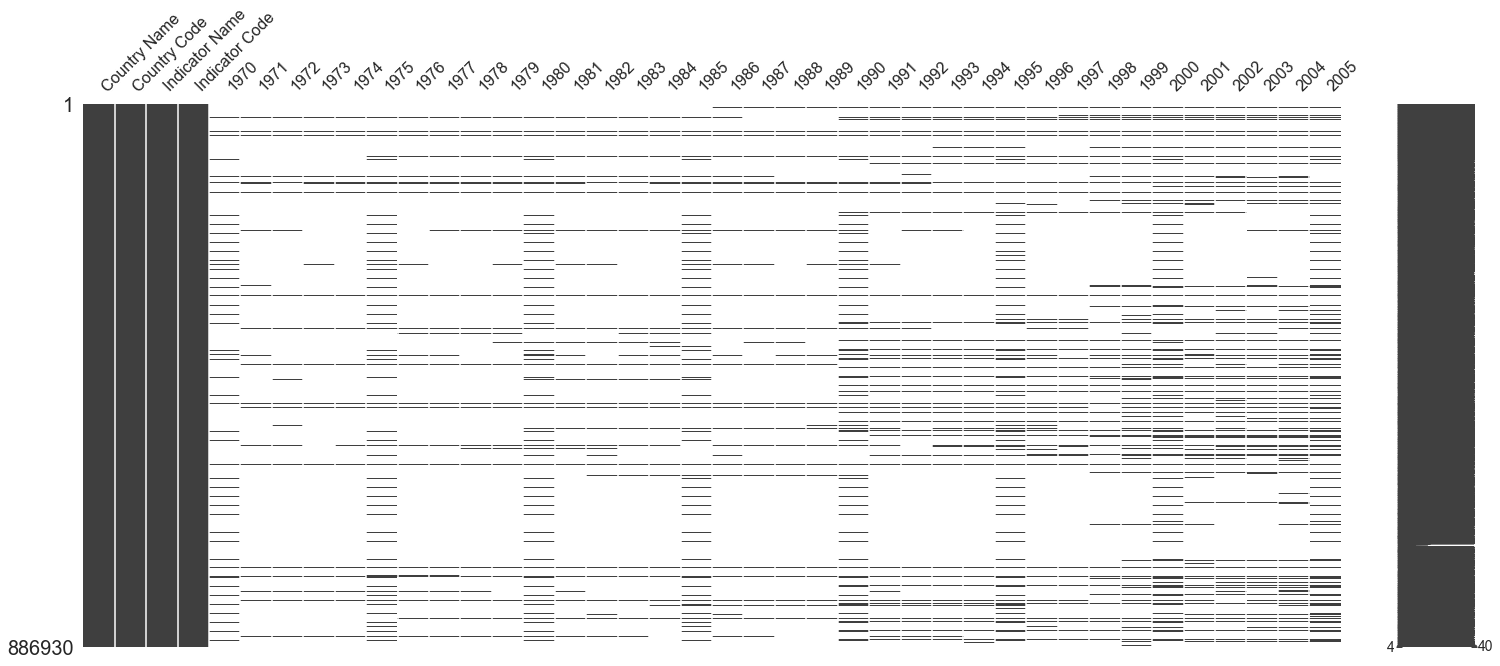

In [16]:
msno.matrix(data[data.columns[0:40]])

-  les 4 premières colonnes sont toujours remplies, et les années sont partiellement remplies selon les indicateurs

<AxesSubplot:>

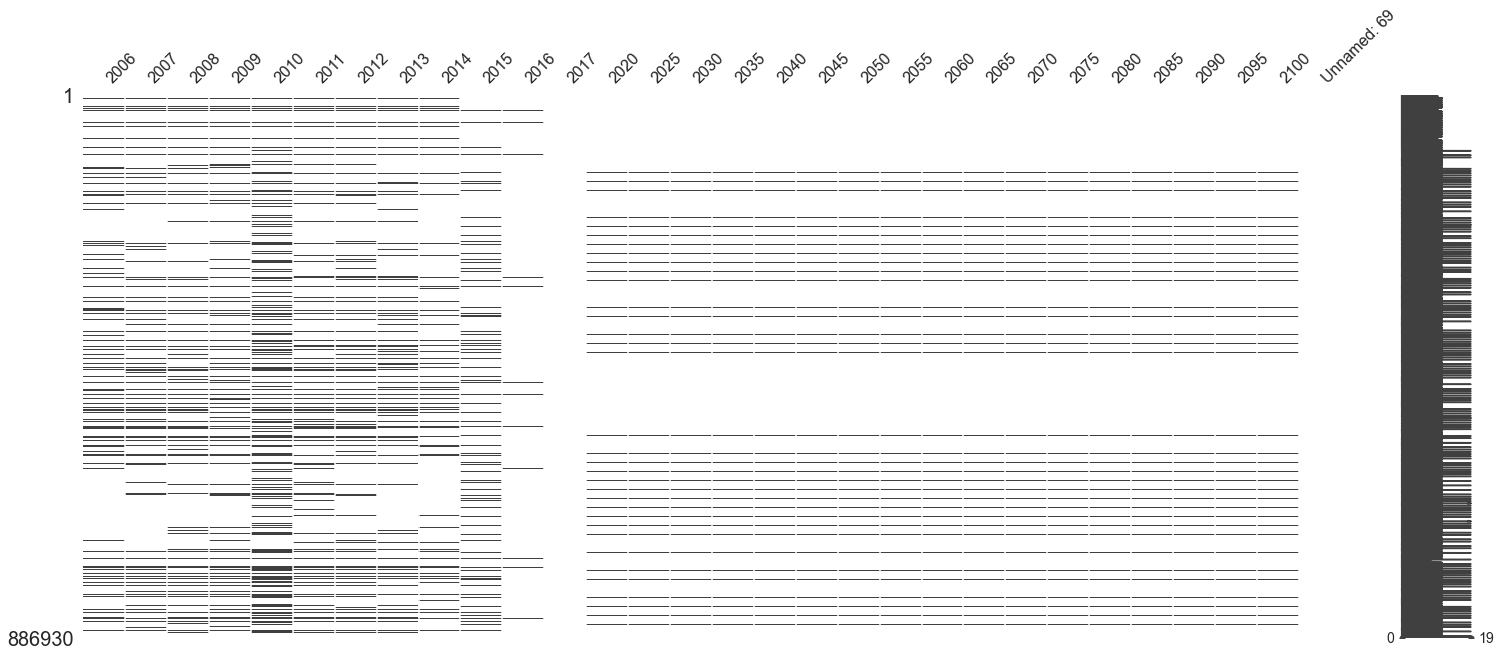

In [17]:
msno.matrix(data[data.columns[40:70]])

Constats principaux : <br>
-  on constate que les 4 premières sont en format objet (que l'on peut convertir en str)
-  on constate que la dernière colonne "Unnamed: 69" ne contient aucune donnée - on va donc la supprimer.
-  2010 semble être l'année la plus remplie, 2014 et 2015 sont les 2 dernières années exploitables pour les indicateurs
-  2017 semble une "année blanche" sans aucune donnée disponible
-  la dernière colonne 'Unnamed:69' est vide
-  les prévisions au-delà de 2050 ne nous intéressent pas, nous supprimerons donc les colonnes 59 à 69.
-  les données de 1970 à 2009 ne nous intéressent pas non plus, nous supprimerons les colonnes 4 à 43

### 1.3.2 | 1er retraitement : suppression des colonnes identifiées comme inutiles à l'analyse 

Les données plus antérieures à 2010 ou au-delà de 2050 ne nous intéressent pas dans le cadre de cette étude exploratoire. 

-  on vérifie ce que l'on souhaite retirer

In [18]:
data.iloc[:,4:44].columns

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009'],
      dtype='object')

In [19]:
data.iloc[:,59:70].columns

Index(['2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095',
       '2100', 'Unnamed: 69'],
      dtype='object')

-  on retire les colonnes avec la méthode drop (inplace=True pour l'appliquer au DataFrame)

In [20]:
data.drop(columns=data.iloc[:,4:44] + data.iloc[:,59:70], inplace=True)

-  on vérifie que le DataFrame n'a plus les premières et dernières colonnes d'années

In [21]:
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data[data["Region"].isnull()]["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'British Virgin Islands',
       'Gibraltar', 'Nauru'], dtype=object)

In [23]:
print("La colonne Country Name contient",data[data["Region"].isnull()]["Country Name"].unique().size,\
      " valeurs non rattachées à une région.\n")
print("Voici le détail des valeurs :\n")
print(data[data["Region"].isnull()]["Country Name"].unique())

La colonne Country Name contient 28  valeurs non rattachées à une région.

Voici le détail des valeurs :

['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'British Virgin Islands' 'Gibraltar' 'Nauru']


Il s'agit des regroupements de pays en zones selon des critères géographiques ou économiques.

### 1.3.3 | vérification : format des 4 premières colonnes (str)

-  on isole les 4 colonnes que l'on souhaite vérifier :

In [24]:
veriftp = data.columns[:4]
veriftp

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], dtype='object')

In [25]:
for i in veriftp:
    print(f"{i}, {type(i)}")

Country Name, <class 'str'>
Country Code, <class 'str'>
Indicator Name, <class 'str'>
Indicator Code, <class 'str'>


-  la conversion de ces variables en str est inutile :

In [26]:
# data[chgtp] = data[chgtp].astype(str)

### 1.3.4 | Vérification des doublons sur le DataFrame 'data'

-  on vérifie qu'il n'y a aucune ligne exactement identique (doublon) :

In [27]:
data.duplicated().sum()

0

In [28]:
data[data.duplicated()].sort_values(by="Country Name").head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region


### 1.3.5 | Analyse post retraitements sur le fichier de données principal (DataFrame 'data') :

In [29]:
# dimensions : nombre de lignes, nombre de colonnes
# la ligne d'en-tête n'est pas comptabilisée
# dans le nombre de lignes
print(data.name)
print("_"*30)
print(data.shape[0], " lignes, ", data.shape[1], " colonnes.")


#afficher les premières lignes du jeu de données
print("_"*30)
print(f"{'premières lignes du jeu de données' :<20}\n")
print(data.head())

#énumération des colonnes et type
print("_"*30)
print(f"{'colonnes et types' :<20}\n")
print(data.dtypes)


#informations sur les données
print("_"*30)
print(f"{'infos sur les données | Non-Null, Dtype' :<20}\n")
print(data.info())


#description des données
print("_"*30)
print(f"{'description des données' :<20}\n")
print(data.describe(include='all'))

EdStatsData.csv
______________________________
886930  lignes,  20  colonnes.
______________________________
premières lignes du jeu de données

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2      

In [30]:
data.describe(include="all")

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
count,886930,886930,886930,886930,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,784310
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,Sub-Saharan Africa (excluding high income),KOR,SABER: (School Autonomy Accountability) Policy...,LO.EGRA.INIT.0.FLF.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208905
mean,NaN,NaN,NaN,NaN,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,NaN
std,NaN,NaN,NaN,NaN,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,NaN
min,NaN,NaN,NaN,NaN,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.322703e+00,1.216330e+01,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01,1.826761e+01,2.000000,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,5.000000e-02,5.000000e-02,4.000000e-02,NaN
50%,NaN,NaN,NaN,NaN,2.046020e+01,9.853510e+01,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01,6.264000e+03,2.000000,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,NaN
75%,NaN,NaN,NaN,NaN,3.121000e+03,1.065065e+05,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04,5.939590e+05,3.000000,6.660000e+00,6.900000e+00,7.062500e+00,7.300000e+00,7.400000e+00,7.432500e+00,7.500000e+00,NaN


### 1.3.6 | Analyses sur les Country Name et ajout d'une colonne "Country Type"

In [31]:
data["Country Name"].unique().size

242

Problème : il n'existe que 197 états reconnus par l'ONU voire 220 en incluant les micro-états et territoires dépendants.
Les 242 pays indiqués dans ce jeu de données peuvent donc soit :
-  contenir des doublons
-  contenir des aggrégations (continents, régions économiques, etc)

In [32]:
data["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


Il peut être intéressant de créer une catégorie (colonne) qui distingue les pays des agrégats, de manière à ne sélectionner que les pays lorsque nous travaillerons au scoring pour le choix des implantations.

Listons dans une variable les noms de région ou continent que nous souhaitons isoler de l'ensemble des pays. Nous affecterons un "Country Type" = "Aggregate". Les pays isolés seront associés au type "Country".

En isolant les premiers noms de la liste, il semble que la distinction agrégats / pays soit bien effectuée.

In [33]:
Aggregate_List = ['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World']

In [34]:
len(Aggregate_List)

25

In [35]:
Countries = ['Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Gibraltar',
       'Greece', 'Greenland', 'Grenada', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Isle of Man', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo',
       'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Macao SAR, China', 'Macedonia, FYR', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Northern Mariana Islands',
       'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Romania',
       'Russian Federation', 'Rwanda', 'Samoa', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan',
       'Spain', 'Sri Lanka', 'St. Kitts and Nevis', 'St. Lucia',
       'St. Martin (French part)', 'St. Vincent and the Grenadines',
       'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland',
       'Syrian Arab Republic', 'Tajikistan', 'Tanzania', 'Thailand',
       'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela, RB', 'Vietnam', 'Virgin Islands (U.S.)',
       'West Bank and Gaza', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

In [36]:
len(Countries)

217

217 pays indépendants contre 220 selon l'ONU. Cela semble cohérent. Implémentons cela dans une nouvelle colonne à insérer au début du DataFrame:

In [37]:
data.insert(0,'Country Type', 'TBD')

In [38]:
data["Country Type"] =  ["Aggregate" if c in Aggregate_List else "Country" for c in data['Country Name']]

In [39]:
data.head()

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
0,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.24514,86.101669,85.51194,85.320152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3.7 | Analyses sur les autres DataFrame

In [40]:
for i in files :
    print (i.name)
    print(i.shape[0], " lignes, ", i.shape[1], " colonnes.")
    print (i.isnull().sum().sum(), " cellules manquantes.")
    #print(i.isna().sum(), "cellules manquantes")
    print (round(i.isnull().mean().mean(),3)*100, "% du total de cellules.")
    print(f"\n% manquant de chaque colonne")
    print("_"*50)
    print(f"{round(i.isna().sum()/i.shape[0],3)*100}")
    print("\ncellules manquantes de chaque colonne")
    print ("_"*50)
    print(i.isna().sum())
    print ("_"*20,"\n")

EdStatsSeries.csv
3665  lignes,  21  colonnes.
55203  cellules manquantes.
71.7 % du total de cellules.

% manquant de chaque colonne
__________________________________________________
Series Code                              0.0
Topic                                    0.0
Indicator Name                           0.0
Short definition                        41.2
Long definition                          0.0
Unit of measure                        100.0
Periodicity                             97.3
Base Period                             91.4
Other notes                             84.9
Aggregation method                      98.7
Limitations and exceptions              99.6
Notes from original source             100.0
General comments                        99.6
Source                                   0.0
Statistical concept and methodology     99.4
Development relevance                   99.9
Related source links                    94.1
Other web links                        100.0
Relat

In [41]:
footnote.tail(10)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643628,ZWE,SH.DYN.MORT,YR1977,Uncertainty bound is 100.3 - 118.3,NaN
643629,ZWE,SH.DYN.MORT,YR1981,Uncertainty bound is 91.4 - 107.4,NaN
643630,ZWE,SH.DYN.MORT,YR1986,Uncertainty bound is 70.8 - 82.9,NaN
643631,ZWE,SH.DYN.MORT,YR1993,Uncertainty bound is 77.2 - 90,NaN
643632,ZWE,SH.DYN.MORT,YR2004,Uncertainty bound is 90.7 - 107.8,NaN
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


# 2 | Sélection des indicateurs potentiels en filtrant par Topic

## 2.1 | Filtre par Topic

In [42]:
series["Topic"].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [43]:
mask = series["Topic"]=='Attainment' #boolean indexing
series.loc[mask,"Indicator Name"].unique() #localisation [lignes : pour les avoir toutes, colonnes]

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       'Barro-Lee: Percentage of population age 15+ with no education',
       'Barro-Lee: Percentage of female population age 20-24 with no education',
       'Barro-Lee: Percentage of population age 20-24 with no education',
       'Barro-Lee: Percentage of female population age 25-29 with no education',
       'Barro-Lee: Percentage of population age 25-29 with no education',
       'Barro-Lee: Percentage of female population age 25+ with no education',
       'Barro-Lee: Percentage of population age 25+ with no education',
       'Barro-Lee: Percentage of female population age 30-34 with no education',
       'Barro-Lee: Percentage of population age 30-34 with no education',
       'Barro-Lee: Percentage of female population age 35-39 with no education

## 2.2 | Recherche des indicateurs avec projection en 2050 (horizon raisonnable de business plan)

In [44]:
data.head(5)

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
0,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aggregate,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.24514,86.101669,85.51194,85.320152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
proj_indicators = data.loc[data["2050"] >= 0 ]["Indicator Name"].unique()
len(proj_indicators)

308

In [46]:
for i in proj_indicators:
    print(i)

Wittgenstein Projection: Mean years of schooling. Age 0-19. Female
Wittgenstein Projection: Mean years of schooling. Age 0-19. Male
Wittgenstein Projection: Mean years of schooling. Age 0-19. Total
Wittgenstein Projection: Mean years of schooling. Age 15+. Female
Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap
Wittgenstein Projection: Mean years of schooling. Age 15+. Male
Wittgenstein Projection: Mean years of schooling. Age 15+. Total
Wittgenstein Projection: Mean years of schooling. Age 15-19. Female
Wittgenstein Projection: Mean years of schooling. Age 15-19. Male
Wittgenstein Projection: Mean years of schooling. Age 15-19. Total
Wittgenstein Projection: Mean years of schooling. Age 20-24. Female
Wittgenstein Projection: Mean years of schooling. Age 20-24. Male
Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
Wittgenstein Projection: Mean years of schooling. Age 20-39. Female
Wittgenstein Projection: Mean years of schooling. Age 20-39. Male
W

In [47]:
maskproj = (data["Indicator Name"] == \
'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total')\
& (data["2050"] >= 0)

In [48]:
data.loc[maskproj]

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
91616,Aggregate,World,WLD,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,1269257.46,NaN,NaN,NaN,NaN,...,NaN,NaN,1599479.25,1781898.44,1967258.22,2151416.19,2330335.99,2500439.40,2662071.37,NaN
98946,Country,Albania,ALB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,883.06,NaN,NaN,NaN,NaN,...,NaN,NaN,1175.09,1302.61,1411.12,1502.85,1581.72,1647.83,1699.83,Europe & Central Asia
102611,Country,Algeria,DZA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,6734.18,NaN,NaN,NaN,NaN,...,NaN,NaN,9792.13,11476.49,13185.97,14873.06,16396.71,17685.56,18786.14,Middle East & North Africa
120936,Country,Argentina,ARG,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,8850.48,NaN,NaN,NaN,NaN,...,NaN,NaN,11360.02,12581.37,13833.85,15034.92,16145.16,17133.34,18008.54,Latin America & Caribbean
124601,Country,Armenia,ARM,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,1608.85,NaN,NaN,NaN,NaN,...,NaN,NaN,1676.72,1720.85,1743.50,1746.81,1734.26,1707.50,1673.58,Europe & Central Asia
128266,Country,Aruba,ABW,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,9.92,NaN,NaN,NaN,NaN,...,NaN,NaN,13.65,15.19,16.96,18.83,20.91,22.87,24.57,Latin America & Caribbean
131931,Country,Australia,AUS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,7689.98,NaN,NaN,NaN,NaN,...,NaN,NaN,9267.09,10059.92,10837.89,11580.95,12258.61,12817.41,13269.20,East Asia & Pacific
135596,Country,Austria,AUT,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,3441.63,NaN,NaN,NaN,NaN,...,NaN,NaN,3693.80,3764.42,3807.36,3826.57,3818.76,3780.53,3709.15,Europe & Central Asia
139261,Country,Azerbaijan,AZE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,4429.65,NaN,NaN,NaN,NaN,...,NaN,NaN,5186.11,5622.51,6059.92,6405.52,6648.13,6818.93,6927.34,Europe & Central Asia
142926,Country,"Bahamas, The",BHS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,26.87,NaN,NaN,NaN,NaN,...,NaN,NaN,37.21,42.80,49.26,56.15,63.63,71.53,79.74,Latin America & Caribbean


In [49]:
data.loc[maskproj].isna().mean()

Country Type      0.000000
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.000000
2011              1.000000
2012              1.000000
2013              1.000000
2014              1.000000
2015              0.000000
2016              1.000000
2017              1.000000
2020              0.000000
2025              0.000000
2030              0.000000
2035              0.000000
2040              0.000000
2045              0.000000
2050              0.000000
Region            0.005988
dtype: float64

## 2.3 | analyse des données manquantes pour chaque indicateur identifié et stockage sélection dans indicator_select

-  Pour chaque indicateur étudié, on teste le taux de manquant par année :

In [50]:
mask = data["Indicator Name"]== \
'Enrolment in tertiary education per 100,000 inhabitants, both sexes'

In [51]:
data.loc[mask].isna().mean()

Country Type      0.000000
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.438017
2011              0.429752
2012              0.454545
2013              0.491736
2014              0.615702
2015              0.983471
2016              1.000000
2017              1.000000
2020              1.000000
2025              1.000000
2030              1.000000
2035              1.000000
2040              1.000000
2045              1.000000
2050              1.000000
Region            0.115702
dtype: float64

-  A ce stade, voici les indicateurs retenus pour les thèmes à aborder, liste à restreindre pour le scoring par pays :

In [52]:
indicator_select = ['Population, total', 'Population growth (annual %)', 'Population, ages 14-19, total', \
                    'Population, ages 15-24, total', \
                    'Population of the official age for upper secondary education, both sexes (number)', \
                    'Population of the official age for tertiary education, both sexes (number)', \
                    'Population of the official age for post-secondary non-tertiary education, both sexes (number)', \
                    'Personal computers (per 100 people)', \
                    'Internet users (per 100 people)', 'GDP, PPP (constant 2011 international $)' #vérifier le second indicateur, \
                    'GDP per capita, PPP (constant 2011 international $)', 'GNI, PPP (current international $)', \
                    'GNI per capita, PPP (current international $)', \
                    'Official entrance age to upper secondary education (years)', \
                    'Barro-Lee: Population in thousands, age 15+, total', \
                    'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary', \
                    'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary', \
                    'Graduates from secondary education, both sexes (number)', \
                    'Graduates from tertiary education, both sexes (number)', \
                    'Enrolment in tertiary education per 100,000 inhabitants, both sexes', \
                    'Enrolment in upper secondary education, both sexes (number)', \
                    'Enrolment in upper secondary general, both sexes (number)', \
                    'Net enrolment rate, secondary, both sexes (%)', \
                    'Percentage of enrolment in upper secondary education in private institutions (%)', \
                    'School life expectancy, secondary, both sexes (years)', \
                    'School life expectancy, tertiary, both sexes (years)', \
                    'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total', \
                    'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total'
                   ]

In [53]:
len(indicator_select)

27

In [54]:
# Vérification du taux de manquant par colonne pour les indicateurs commençant par 'Projection:':

indicateur = 'Projection: '
mask = data[data['Indicator Name'].str.contains(indicateur, regex=True, na=True)].isnull().mean()
# mask = data.loc[data["Indicator Name"] == indicateur, :].isnull().mean()
mask

Country Type      0.000000
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.309917
2011              1.000000
2012              1.000000
2013              1.000000
2014              1.000000
2015              0.309971
2016              1.000000
2017              1.000000
2020              0.309917
2025              0.309917
2030              0.309917
2035              0.309917
2040              0.309917
2045              0.309917
2050              0.309917
Region            0.115702
dtype: float64

In [55]:
# Vérification du taux de manquant par colonne pour un indicateur:

indicateur = 'Personal computers (per 100 people)'
mask = data.loc[data["Indicator Name"] == indicateur, :].isnull().mean()
mask

Country Type      0.000000
Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              1.000000
2011              1.000000
2012              1.000000
2013              1.000000
2014              1.000000
2015              1.000000
2016              1.000000
2017              1.000000
2020              1.000000
2025              1.000000
2030              1.000000
2035              1.000000
2040              1.000000
2045              1.000000
2050              1.000000
Region            0.115702
dtype: float64

In [56]:
print (data.name)
print(data.shape[0], " lignes, ", data.shape[1], " colonnes.")
print (data.isnull().sum().sum(), " cellules manquantes.")
print (round(data.isnull().mean().mean(),3)*100, "% du total de cellules.")
print("\n% manquant de chaque colonne \n", round(data.isna().sum()/data.shape[0],3)*100)
print ("_" * 30)

EdStatsData.csv
886930  lignes,  21  colonnes.
12111841  cellules manquantes.
65.0 % du total de cellules.

% manquant de chaque colonne 
 Country Type        0.0
Country Name        0.0
Country Code        0.0
Indicator Name      0.0
Indicator Code      0.0
2010               72.7
2011               83.5
2012               83.4
2013               84.5
2014               87.2
2015               85.2
2016               98.1
2017              100.0
2020               94.2
2025               94.2
2030               94.2
2035               94.2
2040               94.2
2045               94.2
2050               94.2
Region             11.6
dtype: float64
______________________________


## 2.4 | df Series simplifié : contient juste les définitions des indicateurs retenus

In [57]:
series = series[series["Indicator Name"].isin(indicator_select)].loc[:,["Topic", "Indicator Name", "Long definition"]]

In [58]:
series

,Topic,Indicator Name,Long definition
32,Attainment,"Barro-Lee: Population in thousands, age 15+, t...","Population in thousands, age 15+, total is the..."
183,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with secondar...
273,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with tertiary...
610,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...
611,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...
1667,Economic Policy & Debt: Purchasing power parity,"GNI, PPP (current international $)",PPP GNI (formerly PPP GNP) is gross national i...
1669,Economic Policy & Debt: Purchasing power parity,"GNI per capita, PPP (current international $)",GNI per capita based on purchasing power parit...
1987,Attainment,Projection: Population in thousands by highest...,Total population in thousands that has complet...
2316,Secondary,"Net enrolment rate, secondary, both sexes (%)",Total number of students in the theoretical ag...
2338,Tertiary,"Graduates from tertiary education, both sexes ...",Total number of students successfully completi...


# 3 | Filtrage des données et préparation du DataFrame d'analyse

Logique suivie :<br>
-  Filtrer sur les indicateurs pré-selectionnés pour réduire le jeu de données
-  Pour chaque ligne recopier la dernière valeur non nulle à partir de 2010 jusqu'à la dernière année | fillna() + ffill
-  Créer une nouvelle colonne 'last_value' et lui passer la valeur de la dernière colonne qui vient d'être calculée
-  Supprimer ensuite les colonnes inutiles
-  Ne récupérer que les pays (pas les agrégats)
-  Faire un pivot table du jeu de données
-  Convertir le pivot table en DatafFrame prêt à analyser

## 3.1 Récupérer les données les plus récentes

### On filtre sur la sélection d'indicateurs pour réduire le jeu de données :

In [59]:
data = data[data["Indicator Name"].isin(indicator_select)]

In [60]:
data.head()

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
377,Aggregate,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Aggregate,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,Aggregate,Arab World,ARB,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,Aggregate,Arab World,ARB,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,Aggregate,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,10644779.0,11620177.0,12027609.0,12021613.0,11995984.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### On garde une copie de ce dataframe nommé 'data_raw' pour réaliser quelques boxplot statistiques :

In [61]:
data_raw = data.copy()

In [62]:
mask = (data_raw["Country Name"] == 'South Asia') & (data_raw["Indicator Code"] == "NY.GNP.PCAP.PP.CD")

In [63]:
data_raw[mask]

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2016,2017,2020,2025,2030,2035,2040,2045,2050,Region
74552,Aggregate,South Asia,SAS,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,4087.341481,4379.843387,4632.62327,4919.613819,5289.310727,...,6062.797051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pour chaque ligne recopier la dernière valeur non nulle à partir de 2010 jusqu'à la dernière année | fillna() + ffill et passer cette valeur à la nouvelle colonne 'last_value' :

In [64]:
data["last_value"] = data.loc[:,"2010":"2050"].fillna(method='ffill', axis=1).iloc[:,-1]

In [65]:
data.head()

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2017,2020,2025,2030,2035,2040,2045,2050,Region,last_value
377,Aggregate,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Aggregate,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,Aggregate,Arab World,ARB,"Barro-Lee: Population in thousands, age 15+, t...",BAR.POP.15UP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,Aggregate,Arab World,ARB,"Enrolment in tertiary education per 100,000 in...",UIS.TE_100000.56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,Aggregate,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,10644779.0,11620177.0,12027609.0,12021613.0,11995984.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11995984.0


### Vérifions que 'last_value' correspond à la valeur de 2050 pour la prévision de population :

In [66]:
data.head(2)

,Country Type,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,...,2017,2020,2025,2030,2035,2040,2045,2050,Region,last_value
377,Aggregate,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.SEC.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Aggregate,Arab World,ARB,Barro-Lee: Percentage of population age 15+ wi...,BAR.TER.CMPT.15UP.ZS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
data.loc[(data["Indicator Name"]=='Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total') & (data.last_value.notnull()),["Country Name","2050","last_value"]]

,Country Name,2050,last_value
91616,World,2662071.37,2662071.37
98946,Albania,1699.83,1699.83
102611,Algeria,18786.14,18786.14
120936,Argentina,18008.54,18008.54
124601,Armenia,1673.58,1673.58
128266,Aruba,24.57,24.57
131931,Australia,13269.20,13269.20
135596,Austria,3709.15,3709.15
139261,Azerbaijan,6927.34,6927.34
142926,"Bahamas, The",79.74,79.74


### Identifier dans une variable col_todrop les colonnes inutiles à supprimer :

In [68]:
col_todrop = ['Country Code','Indicator Code', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050']

### Supprimer avec la méthode drop les colonnes 'col_todrop' dans le jeu de données 'data' :

In [69]:
data.drop(columns=col_todrop, inplace=True)

In [70]:
data.columns

Index(['Country Type', 'Country Name', 'Indicator Name', 'Region',
       'last_value'],
      dtype='object')

## 3.2 Produire 3 pivot tables (pays, agrégats, regions) et les convertir en DataFrame prêts à analyser

### On regarde quels sont les indicateurs avec le plus de données disponibles :

In [71]:
data.head(3)

,Country Type,Country Name,Indicator Name,Region,last_value
377,Aggregate,Arab World,Barro-Lee: Percentage of population age 15+ wi...,NaN,NaN
379,Aggregate,Arab World,Barro-Lee: Percentage of population age 15+ wi...,NaN,NaN
480,Aggregate,Arab World,"Barro-Lee: Population in thousands, age 15+, t...",NaN,NaN


In [72]:
data[['Indicator Name', 'last_value']].groupby('Indicator Name').count().sort_values(by='last_value',ascending=False)

,last_value
Indicator Name,
"Population, total",240
Population growth (annual %),240
Internet users (per 100 people),229
"Population of the official age for upper secondary education, both sexes (number)",222
"Population of the official age for tertiary education, both sexes (number)",220
"Enrolment in upper secondary general, both sexes (number)",218
"GNI per capita, PPP (current international $)",213
"GNI, PPP (current international $)",213
"Enrolment in upper secondary education, both sexes (number)",206


### On note que l'indicateur 'Personal computers (per 100 people)' ne contient que des NaN et ne sera pas repris dans le pivot table :

In [73]:
data.loc[data["Indicator Name"] == "Personal computers (per 100 people)", :].isnull().mean()

Country Type      0.000000
Country Name      0.000000
Indicator Name    0.000000
Region            0.115702
last_value        1.000000
dtype: float64

In [74]:
data.loc[data["Indicator Name"] == "Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total", :].isnull().mean()

Country Type     NaN
Country Name     NaN
Indicator Name   NaN
Region           NaN
last_value       NaN
dtype: float64

### On vérifie que le jeu de données est maintenant prêt pour être mis en pivot table :

In [75]:
data.head(5)

,Country Type,Country Name,Indicator Name,Region,last_value
377,Aggregate,Arab World,Barro-Lee: Percentage of population age 15+ wi...,NaN,NaN
379,Aggregate,Arab World,Barro-Lee: Percentage of population age 15+ wi...,NaN,NaN
480,Aggregate,Arab World,"Barro-Lee: Population in thousands, age 15+, t...",NaN,NaN
1201,Aggregate,Arab World,"Enrolment in tertiary education per 100,000 in...",NaN,NaN
1214,Aggregate,Arab World,"Enrolment in upper secondary education, both s...",NaN,11995984.0


In [76]:
data["Indicator Name"].unique()

array(['Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary',
       'Barro-Lee: Population in thousands, age 15+, total',
       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'Enrolment in upper secondary education, both sexes (number)',
       'Enrolment in upper secondary general, both sexes (number)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (current international $)',
       'Graduates from tertiary education, both sexes (number)',
       'Internet users (per 100 people)',
       'Net enrolment rate, secondary, both sexes (%)',
       'Official entrance age to upper secondary education (years)',
       'Percentage of enrolment in upper secondary education in private institutions (%)',
       'Personal computers (per 100 people)',
       'Population growth (annual %)',
       'Populati

### Quelques regroupements sur le jeu de données 'data' pour en évaluer la qualité des indicateurs :

In [77]:
pd.set_option('display.max_colwidth', 20)
data.groupby(by="Indicator Name").describe(percentiles=[0.25, 0.5, 0.75])

last_value                                            \
                          count          mean           std           min   
Indicator Name                                                              
Barro-Lee: Percen...      144.0  2.733903e+01  1.618832e+01  2.190000e+00   
Barro-Lee: Percen...      144.0  8.090000e+00  7.220226e+00  0.000000e+00   
Barro-Lee: Popula...      144.0  3.291145e+04  1.166663e+05  6.700000e+01   
Enrolment in tert...      163.0  2.907201e+03  1.782994e+03  8.014152e+01   
Enrolment in uppe...      206.0  8.004795e+06  2.914215e+07  3.530000e+02   
Enrolment in uppe...      218.0  5.792595e+06  2.219997e+07  3.530000e+02   
GNI per capita, P...      213.0  1.930499e+04  2.039615e+04  7.000000e+02   
GNI, PPP (current...      213.0  3.527915e+12  1.253107e+13  6.583294e+07   
Graduates from te...      145.0  3.040020e+05  1.255912e+06  4.700000e+01   
Internet users (p...      229.0  5.087019e+01  2.797115e+01  0.000000e+00   
Net enrolment rat...      169.0  7.222641e+01  2.207262e+01  1.237506e+01   
Official entrance...      204.0  1.518627e+01  8.622389e-01  1.300000e+01   
Percentage of enr...      167.0  2.244095e+01  2.109859e+01  2.758500e-01   
Personal computer...        0.0           NaN           NaN           NaN   
Population growth...      240.0  1.310549e+00  1.113908e+00 -1.797539e+00   
Population of the...      186.0  5.470926e+06  1.935590e+07  2.110000e+02   
Population of the...      220.0  1.851276e+07  6.948712e+07  8.680000e+02   
Population of the...      222.0  1.156636e+07  4.439239e+07  4.160000e+02   
Population, ages ...      181.0  3.990707e+06  1.426551e+07  8.829000e+03   
Population, ages ...      181.0  6.654995e+06  2.404044e+07  1.445500e+04   
Population, total         240.0  2.094884e+08  8.119465e+08  1.109700e+04   
School life expec...      176.0  5.332909e+00  1.896045e+00  1.255620e+00   
School life expec...      188.0  1.936052e+00  1.298950e+00  3.989000e-02   
Wittgenstein Proj...      167.0  3.138383e+04  2.114228e+05  2.314000e+01   

                                                                              
                               25%           50%           75%           max  
Indicator Name                                                                
Barro-Lee: Percen...  1.587500e+01  2.501000e+01  3.852500e+01  6.877000e+01  
Barro-Lee: Percen...  1.922500e+00  6.390000e+00  1.308750e+01  3.004000e+01  
Barro-Lee: Popula...  2.845750e+03  7.377000e+03  2.068375e+04  1.090693e+06  
Enrolment in tert...  1.200556e+03  2.886403e+03  4.332628e+03  6.784923e+03  
Enrolment in uppe...  6.702250e+04  2.601190e+05  1.629831e+06  2.489281e+08  
Enrolment in uppe...  3.716750e+04  1.491240e+05  1.118519e+06  1.930878e+08  
GNI per capita, P...  4.290000e+03  1.288000e+04  2.587000e+04  1.250000e+05  
GNI, PPP (current...  2.362183e+10  8.631580e+10  7.201289e+11  1.202738e+14  
Graduates from te...  6.674000e+03  3.781500e+04  1.275200e+05  1.192365e+07  
Internet users (p...  2.550658e+01  5.320000e+01  7.549850e+01  9.824002e+01  
Net enrolment rat...  6.053115e+01  7.783375e+01  8.856586e+01  9.965788e+01  
Official entrance...  1.500000e+01  1.500000e+01  1.600000e+01  1.800000e+01  
Percentage of enr...  6.252825e+00  1.714900e+01  3.007618e+01  9.490844e+01  
Personal computer...           NaN           NaN           NaN           NaN  
Population growth...  5.169326e-01  1.165688e+00  2.095190e+00  5.217721e+00  
Population of the...  4.625725e+04  2.795505e+05  1.428867e+06  1.492562e+08  
Population of the...  1.874800e+05  7.856080e+05  3.478678e+06  5.958385e+08  
Population of the...  9.070500e+04  4.490680e+05  2.139532e+06  3.800420e+08  
Population, ages ...  2.779140e+05  8.179730e+05  3.181386e+06  1.477765e+08  
Population, ages ...  4.897540e+05  1.331040e+06  4.945440e+06  2.441202e+08  
Population, total     1.304528e+06  8.741154e+06  3.835572e+07  7.442136e+09  
School life expec...  4.027075e+00  5.502255e

In [78]:
data.groupby(by="Indicator Name").agg(['count','sum','mean','std','min','max'])

last_value                                            \
                          count           sum          mean           std   
Indicator Name                                                              
Barro-Lee: Percen...        144  3.936820e+03  2.733903e+01  1.618832e+01   
Barro-Lee: Percen...        144  1.164960e+03  8.090000e+00  7.220226e+00   
Barro-Lee: Popula...        144  4.739249e+06  3.291145e+04  1.166663e+05   
Enrolment in tert...        163  4.738738e+05  2.907201e+03  1.782994e+03   
Enrolment in uppe...        206  1.648988e+09  8.004795e+06  2.914215e+07   
Enrolment in uppe...        218  1.262786e+09  5.792595e+06  2.219997e+07   
GNI per capita, P...        213  4.111963e+06  1.930499e+04  2.039615e+04   
GNI, PPP (current...        213  7.514459e+14  3.527915e+12  1.253107e+13   
Graduates from te...        145  4.408028e+07  3.040020e+05  1.255912e+06   
Internet users (p...        229  1.164927e+04  5.087019e+01  2.797115e+01   
Net enrolment rat...        169  1.220626e+04  7.222641e+01  2.207262e+01   
Official entrance...        204  3.098000e+03  1.518627e+01  8.622389e-01   
Percentage of enr...        167  3.747638e+03  2.244095e+01  2.109859e+01   
Personal computer...          0  0.000000e+00           NaN           NaN   
Population growth...        240  3.145317e+02  1.310549e+00  1.113908e+00   
Population of the...        186  1.017592e+09  5.470926e+06  1.935590e+07   
Population of the...        220  4.072807e+09  1.851276e+07  6.948712e+07   
Population of the...        222  2.567731e+09  1.156636e+07  4.439239e+07   
Population, ages ...        181  7.223180e+08  3.990707e+06  1.426551e+07   
Population, ages ...        181  1.204554e+09  6.654995e+06  2.404044e+07   
Population, total           240  5.027722e+10  2.094884e+08  8.119465e+08   
School life expec...        176  9.385920e+02  5.332909e+00  1.896045e+00   
School life expec...        188  3.639779e+02  1.936052e+00  1.298950e+00   
Wittgenstein Proj...        167  5.241100e+06  3.138383e+04  2.114228e+05   

                                                  
                               min           max  
Indicator Name                                    
Barro-Lee: Percen...  2.190000e+00  6.877000e+01  
Barro-Lee: Percen...  0.000000e+00  3.004000e+01  
Barro-Lee: Popula...  6.700000e+01  1.090693e+06  
Enrolment in tert...  8.014152e+01  6.784923e+03  
Enrolment in uppe...  3.530000e+02  2.489281e+08  
Enrolment in uppe...  3.530000e+02  1.930878e+08  
GNI per capita, P...  7.000000e+02  1.250000e+05  
GNI, PPP (current...  6.583294e+07  1.202738e+14  
Graduates from te...  4.700000e+01  1.192365e+07  
Internet users (p...  0.000000e+00  9.824002e+01  
Net enrolment rat...  1.237506e+01  9.965788e+01  
Official entrance...  1.300000e+01  1.800000e+01  
Percentage of enr...  2.758500e-01  9.490844e+01  
Personal computer...           NaN           NaN  
Population growth... -1.797539e+00  5.217721e+00  
Population of the...  2.110000e+02  1.492562e+08  
Population of the...  8.680000e+02  5.958385e+08  
Population of the...  4.160000e+02  3.800420e+08  
Population, ages ...  8.829000e+03  1.477765e+08  
Population, ages ...  1.445500e+04  2.441202e+08  
Population, total     1.109700e+04  7.442136e+09  
School life expec...  1.255620e+00  9.510410e+00  
School life expec...  3.989000e-02  4.881850e+00  
Wittgenstein Proj...  2.314000e+01  2.662071e+06

### On teste un pivot table avec lignes = 'Country' et colonnes = 'Indicator Name' et values = 'last_value' :

In [79]:
# si on ne spécifie pas la valeur python ajoute une première ligne dans le DataFrame à retirer pour l'exploitation future.
# Après test, l'ajout du critère values='last_value' ne permet pas d'éviter totalement un 'nettoyage' du pivot après coup.  
data.loc[data["Country Type"] == "Aggregate", :].pivot_table(index="Country Name", columns="Indicator Name", values="last_value")

Indicator Name,"Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)",Internet users (per 100 people),"Net enrolment rate, secondary, both sexes (%)",Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, total","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Country Name,,,,,,,,,,,,,
Arab World,11995984.0,9621427.0,16141.560252,5.968528e+12,36.868602,63.015415,2.012570,7664372.0,35373556.0,21576684.0,3.697615e+08,1.395108,NaN
East Asia & Pacific,68691424.0,41975652.0,17023.396558,3.909910e+13,52.796321,77.172844,0.683098,31719634.0,176505312.0,86350704.0,2.296786e+09,1.936923,NaN
East Asia & Pacific (excluding high income),61394396.0,36518100.0,13805.838966,2.832173e+13,48.386621,75.590935,0.730576,29861540.0,163993680.0,79553952.0,2.051431e+09,1.791630,NaN
Euro area,13309612.0,6616810.5,42163.620114,1.437335e+13,80.446726,91.915207,0.405101,6210057.0,18368574.0,11754640.0,3.408946e+08,3.348349,NaN
Europe & Central Asia,35525304.0,18525366.0,30824.645377,2.811193e+13,73.914751,90.342751,0.503675,11319494.0,57917924.0,32818504.0,9.119953e+08,3.158771,NaN
Europe & Central Asia (excluding high income),14011748.0,7505507.5,18362.505800,7.664962e+12,63.672750,87.879822,0.590132,3265834.0,29304580.0,14600403.0,4.174246e+08,3.055085,NaN
European Union,21992326.0,11249962.0,35461.297412,1.796963e+13,75.497623,92.553505,0.217339,8435001.0,29247084.0,18758106.0,5.067393e+08,3.232256,NaN
Heavily indebted poor countries (HIPC),12237216.0,10096656.0,2202.464411,1.639962e+12,15.667876,30.907959,2.777199,14743358.0,65532520.0,42225004.0,7.446030e+08,0.409379,NaN
High income,45917512.0,32850078.0,47176.230122,5.614110e+13,81.967715,92.243843,0.600171,15951150.0,72561824.0,42234880.0,1.190029e+09,3.678582,NaN


### On crée et convertit le pivot table 'data_scoring' en un DataFrame prêt à analyser, et préparation des colonnes pour population cible :

#### Création et conversion du pivot table 'data_scoring' en dataframe :

In [80]:
data_scoring = data.loc[data["Country Type"] == "Country", :].pivot_table(index=["Country Name","Region"], columns="Indicator Name")

In [81]:
data_scoring.columns = data_scoring.columns.droplevel(0) #remove last_value
data_scoring.columns.name = None                         #remove Indicator Name
data_scoring = data_scoring.reset_index()                #index to columns

In [82]:
data_scoring.set_index("Country Name")

,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)","Graduates from tertiary education, both sexes (number)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 14-19, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,8.65,3.65,19299.0,831.156250,968769.0,943750.0,1900.0,6.588225e+10,24315.0,...,2.689163,1302229.0,3199607.0,2305137.0,4810680.0,7252785.0,34656032.0,3.38414,0.43314,NaN
Albania,Europe & Central...,42.90,0.93,2431.0,6015.172852,151937.0,125256.0,11670.0,3.357241e+10,33529.0,...,-0.159880,112085.0,276247.0,149745.0,312759.0,556269.0,2876101.0,6.69177,3.52327,1699.83
Algeria,Middle East & No...,17.08,6.66,25853.0,3198.919434,1332584.0,1508964.0,14420.0,5.854272e+11,287914.0,...,1.825463,NaN,3492401.0,1796069.0,3556170.0,6467818.0,40606052.0,6.99021,1.72969,18786.14
American Samoa,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111575,NaN,NaN,NaN,NaN,NaN,55599.0,NaN,NaN,NaN
Andorra,Europe & Central...,NaN,NaN,NaN,NaN,1288.0,925.0,NaN,NaN,47.0,...,-0.944017,NaN,NaN,NaN,NaN,NaN,77281.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),Latin America & ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.603319,NaN,NaN,NaN,NaN,NaN,102951.0,NaN,NaN,NaN
West Bank and Gaza,Middle East & No...,NaN,NaN,NaN,4710.088379,142063.0,139338.0,NaN,NaN,39720.0,...,2.884693,105195.0,499101.0,212091.0,708845.0,1053004.0,4551566.0,6.56602,2.47814,1978.47
"Yemen, Rep.",Middle East & No...,10.68,1.50,13540.0,1103.770020,701984.0,690326.0,2500.0,6.890252e+10,NaN,...,2.451502,NaN,2926255.0,1807361.0,3810911.0,5995687.0,27584213.0,2.92386,0.49873,NaN


In [83]:
data_scoring.head(5)

,Country Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 14-19, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,Afghanistan,South Asia,8.65,3.65,19299.0,831.156250,968769.0,943750.0,1900.0,6.588225e+10,...,2.689163,1302229.0,3199607.0,2305137.0,4810680.0,7252785.0,34656032.0,3.38414,0.43314,NaN
1,Albania,Europe & Central...,42.90,0.93,2431.0,6015.172852,151937.0,125256.0,11670.0,3.357241e+10,...,-0.159880,112085.0,276247.0,149745.0,312759.0,556269.0,2876101.0,6.69177,3.52327,1699.83
2,Algeria,Middle East & No...,17.08,6.66,25853.0,3198.919434,1332584.0,1508964.0,14420.0,5.854272e+11,...,1.825463,NaN,3492401.0,1796069.0,3556170.0,6467818.0,40606052.0,6.99021,1.72969,18786.14
3,American Samoa,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.111575,NaN,NaN,NaN,NaN,NaN,55599.0,NaN,NaN,NaN
4,Andorra,Europe & Central...,NaN,NaN,NaN,NaN,1288.0,925.0,NaN,NaN,...,-0.944017,NaN,NaN,NaN,NaN,NaN,77281.0,NaN,NaN,NaN


#### Notre population cible actuelle 'Target Pop, current, in thousands' est estimée par la proportion de diplômés du lycée dans la population de 15 ans et plus qui ont accès à internet

In [84]:
data_scoring["Target Pop, current, in thousands"] = (data_scoring['Barro-Lee: Population in thousands, age 15+, total'] *\
data_scoring['Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary']/ 100)*\
data_scoring['Internet users (per 100 people)'] / 100

#### On ajoute une colonne 'Target Pop, 2050, in thousands' en multipliant la prévision Wittgenstein de la population ayant terminé le lycée pondéré par le dernier taux d'utilisateurs d'internet connu :

In [85]:
data_scoring['Target Pop, 2050, in thousands'] =\
data_scoring['Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total']\
* data_scoring['Internet users (per 100 people)'] / 100

#### On ajoute une colonne 'Target Pop evol %' : 

In [86]:
data_scoring['Target Pop evol %'] = round((data_scoring['Target Pop, 2050, in thousands'] / \
                                           data_scoring['Target Pop, current, in thousands']-1)*100,1)

In [87]:
data_scoring.head(5)

,Country Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)",...,"Population of the official age for upper secondary education, both sexes (number)","Population, ages 14-19, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
0,Afghanistan,South Asia,8.65,3.65,19299.0,831.156250,968769.0,943750.0,1900.0,6.588225e+10,...,2305137.0,4810680.0,7252785.0,34656032.0,3.38414,0.43314,NaN,176.881189,NaN,NaN
1,Albania,Europe & Central...,42.90,0.93,2431.0,6015.172852,151937.0,125256.0,11670.0,3.357241e+10,...,149745.0,312759.0,556269.0,2876101.0,6.69177,3.52327,1699.83,692.103701,1128.065742,63.0
2,Algeria,Middle East & No...,17.08,6.66,25853.0,3198.919434,1332584.0,1508964.0,14420.0,5.854272e+11,...,1796069.0,3556170.0,6467818.0,40606052.0,6.99021,1.72969,18786.14,1896.342367,8067.806803,325.4
3,American Samoa,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55599.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe & Central...,NaN,NaN,NaN,NaN,1288.0,925.0,NaN,NaN,...,NaN,NaN,NaN,77281.0,NaN,NaN,NaN,NaN,NaN,NaN


#### On crée un tableau 'data_pop' à part pour conserver uniquement les données de croissance de la population cible par pays :

In [88]:
data_pop = data_scoring[["Country Name", "Region", "Target Pop, current, in thousands", "Target Pop, 2050, in thousands","Target Pop evol %"]]

### On crée et convertit le pivot table 'data_agg' en un DataFrame prêt à analyser en y retravaillant les différentes colonnes nécessaires :

#### Création et conversion du pivot table 'data_agg' qui contiendra les agrégats :

In [89]:
data_agg = pd.pivot_table(data.loc[(data["Country Type"] == "Country") & (data["Indicator Name"].isin(\
    [\
    'Enrolment in tertiary education per 100,000 inhabitants, both sexes',\
    'Enrolment in upper secondary education, both sexes (number)',\
    'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',\
    'Internet users (per 100 people)',\
    'GNI per capita, PPP (current international $)',\
    'Population, total',\
    'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',\
    'Barro-Lee: Population in thousands, age 15+, total'\
       ])),:],\
    values=["last_value"], \
    index=["Region"], \
    columns=["Indicator Name"],\
    aggfunc=[np.mean, np.sum])

In [90]:
data_agg.head(3)

mean  \
                                                                                                    last_value   
Indicator Name       Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary   
Region                                                                                                           
East Asia & Pacific              27.24619                                                                        
Europe & Central ...             43.60175                                                                        
Latin America & C...             26.04560                                                                        

                                                                         \
                                                                          
Indicator Name       Barro-Lee: Population in thousands, age 15+, total   
Region                                                                    
East Asia & Pacific           81188.47619                                 
Europe & Central ...          17013.95000                                 
Latin America & C...          17004.64000                                 

                                                                                          \
                                                                                           
Indicator Name       Enrolment in tertiary education per 100,000 inhabitants, both sexes   
Region                                                                                     
East Asia & Pacific           3548.918370                                                  
Europe & Central ...          3953.041237                                                  
Latin America & C...          3542.028194                                                  

                                                                                  \
                                                                                   
Indicator Name       Enrolment in upper secondary education, both sexes (number)   
Region                                                                             
East Asia & Pacific          2.928732e+06                                          
Europe & Central ...         6.864309e+05                                          
Latin America & C...         6.784072e+05                                          

                                                                    \
                                                                     
Indicator Name       GNI per capita, PPP (current international $)   
Region                                                               
East Asia & Pacific          22282.000000                            
Europe & Central ...         29335.918367                            
Latin America & C...         14420.000000                            

                                                                        \
                                                                         
Indicator Name       Internet users (per 100 people) Population, total   
Region                                                                   
East Asia & Pacific             48.970507                 6.314625e+07   
Europe & Central ...            74.319663                 1.599931e+07   
Latin America & C...            55.996939                 1.555186e+07   

                                                                                                                                          \
                                                                                                                                           
Indicator Name       Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total   
Region                                                                                                               

In [91]:
data_agg.columns = data_agg.columns.droplevel(1)     #remove last_value
# data_agg.columns.name = None                       #remove Indicator Name
data_agg = data_agg.reset_index()                    #index to columns
data_agg.set_index("Region")
data_agg.columns = data_agg.columns.droplevel(0)     #remove mean and sum

In [92]:
data_agg.rename(columns={"": "Region"}, inplace=True)
data_agg.set_index("Region")

Indicator Name,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Region,,,,,,,,,,,,,,,,
East Asia & Pacific,27.246190,81188.476190,3548.918370,2.928732e+06,22282.000000,48.970507,6.314625e+07,25839.423913,572.17,1704958.0,74527.285767,6.736084e+07,668460.0,1616.026720,2.273265e+09,594306.75
Europe & Central Asia,43.601750,17013.950000,3953.041237,6.864309e+05,29335.918367,74.319663,1.599931e+07,8282.199149,1744.07,680558.0,197652.061829,3.569441e+07,1437460.0,4013.261811,9.119609e+08,389263.36
Latin America & Caribbean,26.045600,17004.640000,3542.028194,6.784072e+05,14420.000000,55.996939,1.555186e+07,7956.278667,651.14,425116.0,92092.733032,2.510107e+07,475860.0,2071.886740,6.376263e+08,238688.36
Middle East & North Africa,22.734118,15029.529412,3028.846468,7.425542e+05,34131.111111,57.957443,2.079622e+07,10167.328235,386.48,255502.0,57548.082886,1.410853e+07,614360.0,1217.106304,4.367207e+08,172844.58
North America,33.990000,138976.000000,3929.777832,4.423299e+06,56263.333333,88.005579,1.198264e+08,82594.535000,67.98,277952.0,7859.555664,1.326990e+07,168790.0,264.016737,3.594793e+08,165189.07
South Asia,17.091429,157207.000000,1386.855015,9.918573e+06,7200.000000,28.313673,2.207979e+08,115700.421667,119.64,1100449.0,9707.985107,6.943001e+07,57600.0,226.509386,1.766383e+09,694202.53
Sub-Saharan Africa,12.354375,9209.812500,907.529789,4.788269e+05,4892.765957,20.312099,2.149358e+07,7915.458537,395.34,294714.0,34486.131966,1.867425e+07,229960.0,954.668648,1.031692e+09,324533.80


In [93]:
data_agg

Indicator Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,East Asia & Pacific,27.246190,81188.476190,3548.918370,2.928732e+06,22282.000000,48.970507,6.314625e+07,25839.423913,572.17,1704958.0,74527.285767,6.736084e+07,668460.0,1616.026720,2.273265e+09,594306.75
1,Europe & Central...,43.601750,17013.950000,3953.041237,6.864309e+05,29335.918367,74.319663,1.599931e+07,8282.199149,1744.07,680558.0,197652.061829,3.569441e+07,1437460.0,4013.261811,9.119609e+08,389263.36
2,Latin America & ...,26.045600,17004.640000,3542.028194,6.784072e+05,14420.000000,55.996939,1.555186e+07,7956.278667,651.14,425116.0,92092.733032,2.510107e+07,475860.0,2071.886740,6.376263e+08,238688.36
3,Middle East & No...,22.734118,15029.529412,3028.846468,7.425542e+05,34131.111111,57.957443,2.079622e+07,10167.328235,386.48,255502.0,57548.082886,1.410853e+07,614360.0,1217.106304,4.367207e+08,172844.58
4,North America,33.990000,138976.000000,3929.777832,4.423299e+06,56263.333333,88.005579,1.198264e+08,82594.535000,67.98,277952.0,7859.555664,1.326990e+07,168790.0,264.016737,3.594793e+08,165189.07
5,South Asia,17.091429,157207.000000,1386.855015,9.918573e+06,7200.000000,28.313673,2.207979e+08,115700.421667,119.64,1100449.0,9707.985107,6.943001e+07,57600.0,226.509386,1.766383e+09,694202.53
6,Sub-Saharan Africa,12.354375,9209.812500,907.529789,4.788269e+05,4892.765957,20.312099,2.149358e+07,7915.458537,395.34,294714.0,34486.131966,1.867425e+07,229960.0,954.668648,1.031692e+09,324533.80


In [94]:
data_agg.columns

Index(['Region',
       'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
       'Barro-Lee: Population in thousands, age 15+, total',
       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'Enrolment in upper secondary education, both sexes (number)',
       'GNI per capita, PPP (current international $)',
       'Internet users (per 100 people)', 'Population, total',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
       'Barro-Lee: Population in thousands, age 15+, total',
       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'Enrolment in upper secondary education, both sexes (number)',
       'GNI per capita, PPP (current international $)',
       'Internet users (per 100 people)', 'Population, total',
 

#### On ne conserve que les colonnes utiles pour la suite :

Nous allons conserver uniquement les colonnes nécessaires pour la suite,  savoir la moyenne (non pondérée) pour tous les indicateurs sauf pour les 2 populations, l'enrolment et la projection de population Wittgenstein :

In [95]:
to_keep=data_agg.iloc[:,np.r_[0:2,3,5:7,10,12,15,16]]

In [96]:
to_keep

Indicator Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Enrolment in tertiary education per 100,000 inhabitants, both sexes","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Barro-Lee: Population in thousands, age 15+, total","Enrolment in upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,East Asia & Pacific,27.246190,3548.918370,22282.000000,48.970507,1704958.0,6.736084e+07,2.273265e+09,594306.75
1,Europe & Central...,43.601750,3953.041237,29335.918367,74.319663,680558.0,3.569441e+07,9.119609e+08,389263.36
2,Latin America & ...,26.045600,3542.028194,14420.000000,55.996939,425116.0,2.510107e+07,6.376263e+08,238688.36
3,Middle East & No...,22.734118,3028.846468,34131.111111,57.957443,255502.0,1.410853e+07,4.367207e+08,172844.58
4,North America,33.990000,3929.777832,56263.333333,88.005579,277952.0,1.326990e+07,3.594793e+08,165189.07
5,South Asia,17.091429,1386.855015,7200.000000,28.313673,1100449.0,6.943001e+07,1.766383e+09,694202.53
6,Sub-Saharan Africa,12.354375,907.529789,4892.765957,20.312099,294714.0,1.867425e+07,1.031692e+09,324533.80


In [97]:
data_agg=to_keep

In [98]:
data_agg

Indicator Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Enrolment in tertiary education per 100,000 inhabitants, both sexes","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Barro-Lee: Population in thousands, age 15+, total","Enrolment in upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,East Asia & Pacific,27.246190,3548.918370,22282.000000,48.970507,1704958.0,6.736084e+07,2.273265e+09,594306.75
1,Europe & Central...,43.601750,3953.041237,29335.918367,74.319663,680558.0,3.569441e+07,9.119609e+08,389263.36
2,Latin America & ...,26.045600,3542.028194,14420.000000,55.996939,425116.0,2.510107e+07,6.376263e+08,238688.36
3,Middle East & No...,22.734118,3028.846468,34131.111111,57.957443,255502.0,1.410853e+07,4.367207e+08,172844.58
4,North America,33.990000,3929.777832,56263.333333,88.005579,277952.0,1.326990e+07,3.594793e+08,165189.07
5,South Asia,17.091429,1386.855015,7200.000000,28.313673,1100449.0,6.943001e+07,1.766383e+09,694202.53
6,Sub-Saharan Africa,12.354375,907.529789,4892.765957,20.312099,294714.0,1.867425e+07,1.031692e+09,324533.80


#### Notre population cible actuelle 'Target Pop, current, in thousands' est estimée par la proportion de diplômés du lycée dans la population de 15 ans et plus qui ont accès à internet

In [99]:
data_agg["Target Pop, current, in thousands"] = (data_agg['Barro-Lee: Population in thousands, age 15+, total'] *\
data_agg['Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary']/ 100)* data_agg['Internet users (per 100 people)'] / 100

#### On ajoute une colonne 'Target Pop, 2050, in thousands' en multipliant la prévision Wittgenstein de la population ayant terminé le lycée pondéré par le dernier taux d'utilisateurs d'internet connu :

In [100]:
data_agg['Target Pop, 2050, in thousands'] =\
data_agg['Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total']\
* data_agg['Internet users (per 100 people)'] / 100

#### On ajoute une colonne 'Target Pop evol %' : 

In [101]:
data_agg['Target Pop evol %'] = round((data_agg['Target Pop, 2050, in thousands'] / data_agg['Target Pop, current, in thousands']-1)*100,1)

In [102]:
data_agg.set_index("Region")

Indicator Name,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Enrolment in tertiary education per 100,000 inhabitants, both sexes","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Barro-Lee: Population in thousands, age 15+, total","Enrolment in upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
Region,,,,,,,,,,,
East Asia & Pacific,27.246190,3548.918370,22282.000000,48.970507,1704958.0,6.736084e+07,2.273265e+09,594306.75,227485.683955,291035.026718,27.9
Europe & Central Asia,43.601750,3953.041237,29335.918367,74.319663,680558.0,3.569441e+07,9.119609e+08,389263.36,220532.599480,289299.217988,31.2
Latin America & Caribbean,26.045600,3542.028194,14420.000000,55.996939,425116.0,2.510107e+07,6.376263e+08,238688.36,62002.057875,133658.175167,115.6
Middle East & North Africa,22.734118,3028.846468,34131.111111,57.957443,255502.0,1.410853e+07,4.367207e+08,172844.58,33665.232982,100176.299044,197.6
North America,33.990000,3929.777832,56263.333333,88.005579,277952.0,1.326990e+07,3.594793e+08,165189.07,83144.049427,145375.597487,74.8
South Asia,17.091429,1386.855015,7200.000000,28.313673,1100449.0,6.943001e+07,1.766383e+09,694202.53,53253.051735,196554.236194,269.1
Sub-Saharan Africa,12.354375,907.529789,4892.765957,20.312099,294714.0,1.867425e+07,1.031692e+09,324533.80,7395.649982,65919.626398,791.3


In [103]:
data_agg.head(5)

Indicator Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,"Enrolment in tertiary education per 100,000 inhabitants, both sexes","GNI per capita, PPP (current international $)",Internet users (per 100 people),"Barro-Lee: Population in thousands, age 15+, total","Enrolment in upper secondary education, both sexes (number)","Population, total",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
0,East Asia & Pacific,27.246190,3548.918370,22282.000000,48.970507,1704958.0,6.736084e+07,2.273265e+09,594306.75,227485.683955,291035.026718,27.9
1,Europe & Central...,43.601750,3953.041237,29335.918367,74.319663,680558.0,3.569441e+07,9.119609e+08,389263.36,220532.599480,289299.217988,31.2
2,Latin America & ...,26.045600,3542.028194,14420.000000,55.996939,425116.0,2.510107e+07,6.376263e+08,238688.36,62002.057875,133658.175167,115.6
3,Middle East & No...,22.734118,3028.846468,34131.111111,57.957443,255502.0,1.410853e+07,4.367207e+08,172844.58,33665.232982,100176.299044,197.6
4,North America,33.990000,3929.777832,56263.333333,88.005579,277952.0,1.326990e+07,3.594793e+08,165189.07,83144.049427,145375.597487,74.8


### On crée et convertit le pivot table 'data_scoring_reg' en un DataFrame prêt à analyser (pas exploité) :

In [104]:
data_scoring_reg = data.loc[data["Country Type"] == "Country", :].pivot_table(index="Region", columns="Indicator Name")

In [105]:
data_scoring_reg.columns = data_scoring_reg.columns.droplevel(0)     #remove last_value
data_scoring_reg.columns.name = None                                 #remove Indicator Name
data_scoring_reg = data_scoring_reg.reset_index()                    #index to columns

In [106]:
data_scoring_reg.set_index("Region")

,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)","Graduates from tertiary education, both sexes (number)",Internet users (per 100 people),...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 14-19, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,27.246190,10.296190,81188.476190,3548.918370,2.928732e+06,1.555431e+06,22282.000000,1.261286e+12,9.076852e+05,48.970507,...,1.105317,1.221829e+06,5.659346e+06,2.737201e+06,7.169842e+06,1.236834e+07,6.314625e+07,5.430943,2.321650,25839.423913
Europe & Central Asia,43.601750,13.364250,17013.950000,3953.041237,6.864309e+05,3.500157e+05,29335.918367,5.727981e+11,1.736721e+05,74.319663,...,0.427179,3.387428e+05,1.146364e+06,6.363176e+05,1.322949e+06,2.348418e+06,1.599931e+07,7.380059,2.943811,8282.199149
Latin America & Caribbean,26.045600,6.425600,17004.640000,3542.028194,6.784072e+05,5.584060e+05,14420.000000,2.850638e+11,1.161767e+05,55.996939,...,0.886236,2.877181e+05,1.500575e+06,8.813382e+05,2.094741e+06,3.436383e+06,1.555186e+07,5.105766,2.151382,7956.278667
Middle East & North Africa,22.734118,8.075882,15029.529412,3028.846468,7.425542e+05,5.933894e+05,34131.111111,4.609798e+11,1.410938e+05,57.957443,...,2.122460,6.843974e+05,1.903401e+06,1.067256e+06,2.079868e+06,3.530033e+06,2.079622e+07,5.371154,1.768969,10167.328235
North America,33.990000,24.715000,138976.000000,3929.777832,4.423299e+06,4.383472e+06,56263.333333,6.849493e+12,1.907035e+06,88.005579,...,0.684618,2.538326e+06,8.386331e+06,4.471815e+06,1.425423e+07,2.476051e+07,1.198264e+08,5.837987,2.903230,82594.535000
South Asia,17.091429,3.674286,157207.000000,1386.855015,9.918573e+06,8.361593e+06,7200.000000,1.338653e+12,1.269984e+06,28.313673,...,1.562222,1.029230e+07,2.019535e+07,1.676094e+07,2.536290e+07,4.185906e+07,2.207979e+08,4.705566,0.741939,115700.421667
Sub-Saharan Africa,12.354375,1.284063,9209.812500,907.529789,4.788269e+05,3.056028e+05,4892.765957,7.929699e+10,2.877211e+04,20.312099,...,2.526502,7.590760e+05,1.904754e+06,1.338390e+06,2.779365e+06,4.294117e+06,2.149358e+07,3.081026,0.500953,7915.458537


In [107]:
data_scoring_reg.head(5)

,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)","Graduates from tertiary education, both sexes (number)",...,Population growth (annual %),"Population of the official age for post-secondary non-tertiary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population of the official age for upper secondary education, both sexes (number)","Population, ages 14-19, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
0,East Asia & Pacific,27.246190,10.296190,81188.476190,3548.918370,2.928732e+06,1.555431e+06,22282.000000,1.261286e+12,9.076852e+05,...,1.105317,1.221829e+06,5.659346e+06,2.737201e+06,7.169842e+06,1.236834e+07,6.314625e+07,5.430943,2.321650,25839.423913
1,Europe & Central...,43.601750,13.364250,17013.950000,3953.041237,6.864309e+05,3.500157e+05,29335.918367,5.727981e+11,1.736721e+05,...,0.427179,3.387428e+05,1.146364e+06,6.363176e+05,1.322949e+06,2.348418e+06,1.599931e+07,7.380059,2.943811,8282.199149
2,Latin America & ...,26.045600,6.425600,17004.640000,3542.028194,6.784072e+05,5.584060e+05,14420.000000,2.850638e+11,1.161767e+05,...,0.886236,2.877181e+05,1.500575e+06,8.813382e+05,2.094741e+06,3.436383e+06,1.555186e+07,5.105766,2.151382,7956.278667
3,Middle East & No...,22.734118,8.075882,15029.529412,3028.846468,7.425542e+05,5.933894e+05,34131.111111,4.609798e+11,1.410938e+05,...,2.122460,6.843974e+05,1.903401e+06,1.067256e+06,2.079868e+06,3.530033e+06,2.079622e+07,5.371154,1.768969,10167.328235
4,North America,33.990000,24.715000,138976.000000,3929.777832,4.423299e+06,4.383472e+06,56263.333333,6.849493e+12,1.907035e+06,...,0.684618,2.538326e+06,8.386331e+06,4.471815e+06,1.425423e+07,2.476051e+07,1.198264e+08,5.837987,2.903230,82594.535000


# 4 | Analyse de la Qualité du DataFrame 'data_scoring'

## 4.1 Existe-t-il des doublons dans les pays?

In [108]:
data_scoring.duplicated('Country Name').sum()

0

Il n'y a pas de doublons de pays.

## 4.2 Traitement n°1 des valeurs manquantes | élimination des pays où trop de données manquent

In [109]:
print(f"Ce jeu de données contient {round(data_scoring.isna().mean().mean()*100,2)}% de données manquantes")

Ce jeu de données contient 17.99% de données manquantes


In [110]:
print(f"Cela représente {data_scoring.isna().sum().sum()} données manquantes")

Cela représente 1078 données manquantes


Nous allons identifier les pays pour lesquels les données sont les moins fournies et les supprimer.<br>
Pour cela nous créons une colonne 'is_null' contenant la moyenne par ligne des cellules NaN : 

In [111]:
data_scoring["is_null"] = data_scoring.isnull().mean(axis=1)

Nous définissons un taux maximal acceptable de manquants pour conserver le pays dans l'analyse :

## 4.3 Fixer le taux de manquants acceptable à 5% et supprimer les pays aux données insuffisantes

In [112]:
data_scoring.isnull().mean()

Country Name                                                                                                           0.000000
Region                                                                                                                 0.000000
Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary                              0.327103
Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary                                0.327103
Barro-Lee: Population in thousands, age 15+, total                                                                     0.327103
Enrolment in tertiary education per 100,000 inhabitants, both sexes                                                    0.238318
Enrolment in upper secondary education, both sexes (number)                                                            0.158879
Enrolment in upper secondary general, both sexes (number)                                               

In [113]:
# taux_limite_nan = float(input("Quel est le taux maximum acceptable pour les manquants par pays? (entre 0.00 et 1.00)")) #0.05
taux_limite_nan = 0.05
mask = data_scoring["is_null"] > taux_limite_nan

In [114]:
print(f"""
Il existe {mask[mask].shape[0]} pays dont le taux de NaN est supérieur à {taux_limite_nan*100}%.""")


Il existe 117 pays dont le taux de NaN est supérieur à 5.0%.


On supprime les pays dont le taux est supérieur à la limite fixée (on conserve ceux hors de 'mask') :

In [115]:
data_scoring = data_scoring[~mask]

In [116]:
print(f"{len(data_scoring.index)} pays ont un taux de manquant compris dans les limites définies pour l'analyse") 

97 pays ont un taux de manquant compris dans les limites définies pour l'analyse


In [117]:
data_scoring[["Country Name", "is_null"]].sort_values(by="is_null", ascending=False)

,Country Name,is_null
213,Zimbabwe,0.035714
94,Jamaica,0.035714
173,South Africa,0.035714
169,Slovak Republic,0.035714
82,Honduras,0.035714
83,"Hong Kong SAR, C...",0.035714
87,Indonesia,0.035714
92,Israel,0.035714
145,Pakistan,0.035714
96,Jordan,0.035714


In [118]:
print(f"Après suppression des pays non retenus, ce jeu de données contient {data_scoring.isna().mean().mean()*100:.2f}% de données manquantes")

Après suppression des pays non retenus, ce jeu de données contient 1.17% de données manquantes


## 4.4 Traitement n°2 des valeurs manquantes | imputation pour les données manquantes restantes

### 4.4.0 Identification des indicateurs concernés par l'imputation :

In [119]:
data_scoring.head(5)

,Country Name,Region,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)",...,"Population, ages 14-19, total","Population, ages 15-24, total","Population, total","School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %,is_null
1,Albania,Europe & Central...,42.90,0.93,2431.0,6015.172852,1.519370e+05,1.252560e+05,11670.0,3.357241e+10,...,312759.0,556269.0,2876101.0,6.69177,3.52327,1699.83,692.103701,1128.065742,63.0,0.000000
7,Argentina,Latin America & ...,31.07,2.87,30538.0,6507.572754,1.722700e+06,1.722700e+06,19530.0,8.565009e+11,...,4098044.0,6886530.0,43847430.0,6.39484,4.20124,18008.54,6656.014374,12633.128451,89.8,0.035714
10,Australia,East Asia & Pacific,38.49,18.52,17323.0,6153.159180,1.104162e+06,5.462140e+05,45970.0,1.109159e+12,...,1668288.0,2914620.0,24127159.0,7.89545,4.26626,13269.20,5883.420794,11708.564014,99.0,0.000000
11,Austria,Europe & Central...,40.81,9.37,7090.0,4945.743652,3.631876e+05,1.096821e+05,50620.0,4.427791e+11,...,535544.0,964629.0,8747358.0,7.78028,3.87339,3709.15,2439.835721,3127.678843,28.2,0.035714
14,Bahrain,Middle East & No...,32.11,7.76,600.0,2798.455078,4.410000e+04,3.700800e+04,44250.0,6.070820e+10,...,74460.0,132609.0,1425171.0,NaN,1.70752,1123.47,188.806763,1101.000383,483.1,0.035714


In [120]:
indic_missing = list(data_scoring.columns[data_scoring.isna().mean() > 0])

In [121]:
print("Les indicateurs pour lesquels il reste des valeurs manquantes sont:")
for i, item in enumerate(indic_missing,1):
    print(i, '. ' + item, sep='',end='\n')

Les indicateurs pour lesquels il reste des valeurs manquantes sont:
1. Graduates from tertiary education, both sexes (number)
2. Net enrolment rate, secondary, both sexes (%)
3. Percentage of enrolment in upper secondary education in private institutions (%)
4. Population of the official age for post-secondary non-tertiary education, both sexes (number)
5. School life expectancy, secondary, both sexes (years)


### 4.4.1 Indicateur 1 | nous passons la médiane de la colonne dans les valeurs manquantes :

In [122]:
data_scoring = data_scoring.fillna({"Graduates from tertiary education, both sexes (number)": \
                                    data_scoring["Graduates from tertiary education, both sexes (number)"].median()})

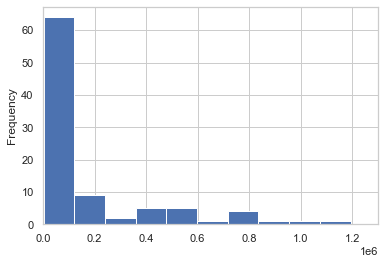

In [123]:
ax = data_scoring['Graduates from tertiary education, both sexes (number)'].plot.hist(bins=100, xlim=[0,1300000])

### 4.4.2 Indicateur 2 | nous passons la médiane de la colonne dans les valeurs manquantes :

In [124]:
data_scoring = data_scoring.fillna({"Net enrolment rate, secondary, both sexes (%)": data_scoring["Net enrolment rate, secondary, both sexes (%)"].median()})

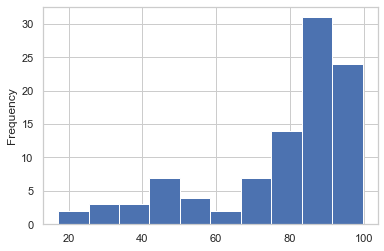

In [125]:
ax = data_scoring['Net enrolment rate, secondary, both sexes (%)'].plot.hist(bins=10)

### 4.4.3 Indicateur 3 | nous passons la médiane de la colonne dans les valeurs manquantes :

In [126]:
data_scoring = data_scoring.fillna({"Percentage of enrolment in upper secondary education in private institutions (%)": data_scoring["Percentage of enrolment in upper secondary education in private institutions (%)"].median()})

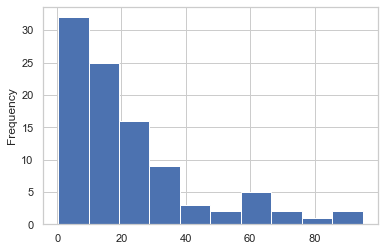

In [127]:
ax = data_scoring['Percentage of enrolment in upper secondary education in private institutions (%)'].plot.hist(bins=10)

### 4.4.4 Indicateur 4 | nous passons la médiane de la colonne dans les valeurs manquantes :

In [128]:
data_scoring = data_scoring.fillna({"Population of the official age for post-secondary non-tertiary education, both sexes (number)": data_scoring["Population of the official age for post-secondary non-tertiary education, both sexes (number)"].median()})

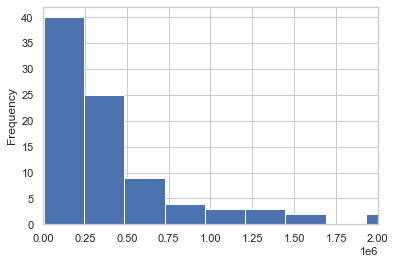

In [129]:
ax = data_scoring['Population of the official age for post-secondary non-tertiary education, both sexes (number)'].plot.hist(bins=200,xlim=[0, 2000000])

### 4.4.5 Indicateur 5 | nous passons la médiane de la colonne dans les valeurs manquantes :

In [130]:
data_scoring = data_scoring.fillna({"School life expectancy, secondary, both sexes (years)": data_scoring["School life expectancy, secondary, both sexes (years)"].median()})

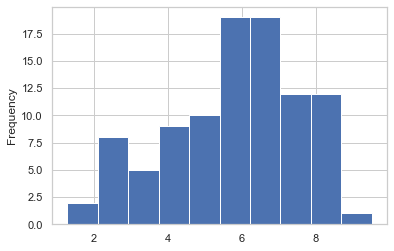

In [131]:
ax = data_scoring['School life expectancy, secondary, both sexes (years)'].plot.hist(bins=10)

### 4.4.6 vérification qu'il n'y a plus de valeurs manquantes :

In [132]:
indic_missing_final = list(data_scoring.columns[data_scoring.isna().mean() > 0])

In [133]:
print("Les indicateurs pour lesquels il reste des valeurs manquantes dans le jeu de données final sont:")
for i, item in enumerate(indic_missing_final,1):
    print(i, '. ' + item, sep='',end='\n')

Les indicateurs pour lesquels il reste des valeurs manquantes dans le jeu de données final sont:


In [134]:
data_scoring.isna().sum().sum()

0

Plus d'autre indicateur à redresser. Nous pouvons explorer les données.

# 5 | Sélection des valeurs d'intérêt et scoring (requiert input User)

**Valeurs d'intérêt:**
- Education : 
 - Education_1 | Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
 - Education_2 | Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Tertiary

- Population | Population, total

- Internet | Internet users (per 100 people)

- Economie | GNI per capita, PPP (current international $)

**Scoring:** <br><br>
Score entre 0 et 1 pour noter les différents critères (1 pour le plus haut, 0 pour le plus bas).<br>
-  créer une colonne score Economie, score Population, score Internet, score Education (moyenne Education_1 et Education_2)
-  utiliser le min max scaler : (valeur - val min) / (val max - val min) pour établir un score
-  l'indicateur synthétique sera la moyenne de ces indicateurs, pondéré par un coefficient demandé à l'utilisateur
-  le nombre de pays à retenir dans le classement sera également demandé à l'utilisateur

## 5.1 Exploration du jeu de données

Combien d'individus le jeu de données contient-il ?

In [135]:
print(f"Ce jeu de données contient {data_scoring.index.size} pays")

Ce jeu de données contient 97 pays


In [136]:
print(f"Ce jeu de données contient {data_scoring.columns.size} indicateurs")

Ce jeu de données contient 29 indicateurs


In [137]:
print("Ce jeu de données contient ", data_scoring.isna().sum().sum(), "manquants.")

Ce jeu de données contient  0 manquants.


In [138]:
data_scoring.columns.unique()

Index(['Country Name', 'Region',
       'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
       'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary',
       'Barro-Lee: Population in thousands, age 15+, total',
       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'Enrolment in upper secondary education, both sexes (number)',
       'Enrolment in upper secondary general, both sexes (number)',
       'GNI per capita, PPP (current international $)',
       'GNI, PPP (current international $)',
       'Graduates from tertiary education, both sexes (number)',
       'Internet users (per 100 people)',
       'Net enrolment rate, secondary, both sexes (%)',
       'Official entrance age to upper secondary education (years)',
       'Percentage of enrolment in upper secondary education in private institutions (%)',
       'Population growth (annual %)',
       'Population of the off

## 5.2 Valeur d'intérêt pour chaque indicateur

### 5.2.1 Education

Vérification de la définition de l'indicateur cible :

In [139]:
series.loc[series["Indicator Name"] == \
           "Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary", "Long definition"].values

array(['Percentage of population age 15+ with tertiary schooling. Completed Tertiary'],
      dtype=object)

Indicateur 'Education_1' reprendra 'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary' :

In [140]:
data_scoring.loc[data_scoring['Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary'] > 0, ['Country Name', 'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary']].sort_values(by='Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary', ascending=False)

,Country Name,Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
101,"Korea, Rep.",30.04
90,Ireland,26.80
203,United States,26.76
157,Russian Federation,24.74
200,Ukraine,24.55
73,Greece,22.50
50,Cyprus,20.75
92,Israel,20.26
129,Mongolia,19.66
95,Japan,18.91


Indicateur 'Education_2' reprendra 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Tertiary' :

In [141]:
data_scoring.loc[data_scoring['Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary'] > 0, ['Country Name', 'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary']].sort_values(by='Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary', ascending=False)

,Country Name,Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary
51,Czech Republic,68.77
97,Kazakhstan,66.25
104,Kyrgyz Republic,65.02
187,Tajikistan,62.27
169,Slovak Republic,61.79
152,Poland,58.39
170,Slovenia,56.12
127,Moldova,54.27
173,South Africa,53.90
84,Hungary,52.92


### 5.2.2 Population

Vérification de la définition de l'indicateur cible :

In [142]:
series.loc[series["Indicator Name"] == \
           "Population, total", "Long definition"].values

array(['Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.'],
      dtype=object)

Indicateur 'Population' reprendra 'Population, total' :

In [143]:
data_scoring.loc[data_scoring['Population, total'] > 0, ['Country Name', 'Population, total']].sort_values(by='Population, total', ascending=False)

,Country Name,"Population, total"
40,China,1.378665e+09
86,India,1.324171e+09
203,United States,3.231275e+08
87,Indonesia,2.611155e+08
26,Brazil,2.076529e+08
145,Pakistan,1.932035e+08
15,Bangladesh,1.629516e+08
157,Russian Federation,1.443424e+08
125,Mexico,1.275404e+08
95,Japan,1.269945e+08


On vérifie que le taux de croissance de la population n'est pas un élément qui permette de vraiment faire la différence :

In [144]:
data_scoring.loc[data_scoring['Population growth (annual %)'] > 0, ['Country Name', 'Population growth (annual %)']].sort_values(by='Population growth (annual %)', ascending=False)

,Country Name,Population growth (annual %)
140,Niger,3.826066
14,Bahrain,3.812797
155,Qatar,3.495070
96,Jordan,3.185855
30,Burundi,3.135333
120,Mali,2.971969
103,Kuwait,2.924206
117,Malawi,2.904819
132,Mozambique,2.881208
20,Benin,2.763534


### 5.2.3 Internet

Vérification de la définition de l'indicateur cible :

In [145]:
series.loc[series["Indicator Name"] == \
           "Internet users (per 100 people)", "Long definition"].values

array(['Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.'],
      dtype=object)

Indicateur 'Internet' reprendra 'Internet users (per 100 people)' :

In [146]:
data_scoring.loc[data_scoring['Internet users (per 100 people)'] > 0, ['Country Name', 'Internet users (per 100 people)']].sort_values(by='Internet users (per 100 people)', ascending=False)

,Country Name,Internet users (per 100 people)
85,Iceland,98.240016
14,Bahrain,97.999981
113,Luxembourg,97.493930
143,Norway,97.298204
52,Denmark,96.967785
202,United Kingdom,94.775801
155,Qatar,94.291118
101,"Korea, Rep.",92.716545
95,Japan,92.000000
184,Sweden,91.506828


### 5.2.4 Economie

Vérification de la définition de l'indicateur cible :

In [147]:
series.loc[series["Indicator Name"] == \
           "GNI per capita, PPP (current international $)", "Long definition"].values

array(['GNI per capita based on purchasing power parity (PPP). PPP GNI is gross national income (GNI) converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GNI as a U.S. dollar has in the United States. GNI is the sum of value added by all resident producers plus any product taxes (less subsidies) not included in the valuation of output plus net receipts of primary income (compensation of employees and property income) from abroad. Data are in current international dollars based on the 2011 ICP round.'],
      dtype=object)

Indicateur 'Economie' reprendra 'GNI per capita, PPP (current international $)' :

In [148]:
data_scoring.loc[data_scoring['GNI per capita, PPP (current international $)'] != "" , ['Country Name', 'GNI per capita, PPP (current international $)']].sort_values(by='GNI per capita, PPP (current international $)', ascending=False)

,Country Name,"GNI per capita, PPP (current international $)"
155,Qatar,125000.0
114,"Macao SAR, China",98650.0
103,Kuwait,83310.0
113,Luxembourg,70430.0
185,Switzerland,63660.0
143,Norway,62550.0
83,"Hong Kong SAR, C...",60630.0
203,United States,58700.0
90,Ireland,56870.0
162,Saudi Arabia,55860.0


## 5.3 Scoring  (requiert input User)

### 5.3.1 On renomme les colonnes à conserver et on simplifie le jeu de données 'data scoring'

On renomme les colonnes à conserver en Education_1, Education_2, Population, Internet, Economie :

In [149]:
data_scoring.rename(columns={"Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary": "Education_1",
                             "Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary": "Education_2",
                             "Population, total" : "Population", "Internet users (per 100 people)" : "Internet",
                             "GNI per capita, PPP (current international $)" : "Economie" }, inplace=True)

On conserve uniquement les colonnes Country Name, Education_1, Education_2, Population, Internet, Economie :

In [150]:
data_scoring.head(5)

,Country Name,Region,Education_2,Education_1,"Barro-Lee: Population in thousands, age 15+, total","Enrolment in tertiary education per 100,000 inhabitants, both sexes","Enrolment in upper secondary education, both sexes (number)","Enrolment in upper secondary general, both sexes (number)",Economie,"GNI, PPP (current international $)",...,"Population, ages 14-19, total","Population, ages 15-24, total",Population,"School life expectancy, secondary, both sexes (years)","School life expectancy, tertiary, both sexes (years)",Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %,is_null
1,Albania,Europe & Central...,42.90,0.93,2431.0,6015.172852,1.519370e+05,1.252560e+05,11670.0,3.357241e+10,...,312759.0,556269.0,2876101.0,6.691770,3.52327,1699.83,692.103701,1128.065742,63.0,0.000000
7,Argentina,Latin America & ...,31.07,2.87,30538.0,6507.572754,1.722700e+06,1.722700e+06,19530.0,8.565009e+11,...,4098044.0,6886530.0,43847430.0,6.394840,4.20124,18008.54,6656.014374,12633.128451,89.8,0.035714
10,Australia,East Asia & Pacific,38.49,18.52,17323.0,6153.159180,1.104162e+06,5.462140e+05,45970.0,1.109159e+12,...,1668288.0,2914620.0,24127159.0,7.895450,4.26626,13269.20,5883.420794,11708.564014,99.0,0.000000
11,Austria,Europe & Central...,40.81,9.37,7090.0,4945.743652,3.631876e+05,1.096821e+05,50620.0,4.427791e+11,...,535544.0,964629.0,8747358.0,7.780280,3.87339,3709.15,2439.835721,3127.678843,28.2,0.035714
14,Bahrain,Middle East & No...,32.11,7.76,600.0,2798.455078,4.410000e+04,3.700800e+04,44250.0,6.070820e+10,...,74460.0,132609.0,1425171.0,6.083825,1.70752,1123.47,188.806763,1101.000383,483.1,0.035714


In [151]:
data_scoring = data_scoring[["Country Name", "Region", "Education_1", "Education_2", "Population", "Internet", "Economie", "Target Pop, current, in thousands", "Target Pop, 2050, in thousands", "Target Pop evol %"]]

### 5.3.2 Notre jeu de données est prêt pour réaliser le scoring

In [152]:
data_scoring.head(4)

,Country Name,Region,Education_1,Education_2,Population,Internet,Economie,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
1,Albania,Europe & Central...,0.93,42.90,2876101.0,66.363445,11670.0,692.103701,1128.065742,63.0
7,Argentina,Latin America & ...,2.87,31.07,43847430.0,70.150764,19530.0,6656.014374,12633.128451,89.8
10,Australia,East Asia & Pacific,18.52,38.49,24127159.0,88.238658,45970.0,5883.420794,11708.564014,99.0
11,Austria,Europe & Central...,9.37,40.81,8747358.0,84.323331,50620.0,2439.835721,3127.678843,28.2


Avant de modifier ce jeu de données, nous allons en conserver une version 'data_pays' pour réaliser quelques statistiques plus loin :

In [153]:
data_pays = data_scoring.copy()

In [154]:
data_pays

,Country Name,Region,Education_1,Education_2,Population,Internet,Economie,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
1,Albania,Europe & Central...,0.93,42.90,2.876101e+06,66.363445,11670.0,692.103701,1128.065742,63.0
7,Argentina,Latin America & ...,2.87,31.07,4.384743e+07,70.150764,19530.0,6656.014374,12633.128451,89.8
10,Australia,East Asia & Pacific,18.52,38.49,2.412716e+07,88.238658,45970.0,5883.420794,11708.564014,99.0
11,Austria,Europe & Central...,9.37,40.81,8.747358e+06,84.323331,50620.0,2439.835721,3127.678843,28.2
14,Bahrain,Middle East & No...,7.76,32.11,1.425171e+06,97.999981,44250.0,188.806763,1101.000383,483.1
15,Bangladesh,South Asia,2.28,24.97,1.629516e+08,18.246938,3790.0,4719.739042,4820.414041,2.1
18,Belgium,Europe & Central...,17.69,33.24,1.134816e+07,86.516500,46010.0,2535.025157,3278.153443,29.3
19,Belize,Latin America & ...,3.18,30.33,3.669540e+05,44.575740,7950.0,26.498851,21.926807,-17.3
20,Benin,Sub-Saharan Africa,2.01,17.77,1.087230e+07,11.994048,2170.0,118.907588,253.621339,113.3
26,Brazil,Latin America & ...,5.63,26.37,2.076529e+08,59.682747,14840.0,22865.920115,53981.916983,136.1


### 5.3.4 Réglage du 'poids' de chaque indicateur dans le score synthétique final :  (requiert input User)

#### Saisie des coefficients souhaités pour chaque indicateur

In [155]:
# On demande à l'utilisateur de saisir des coefficients
poids_pop, poids_edu, poids_web, poids_eco = \
input("Saisir le poids à donner aux indicateurs SCORE_POP/SCORE_EDU/SCORE_WEB/SCORE_ECO de 1 à 3 et séparés par un /" \
      +"\n"+"Par exemple : 1/3/3/3 :"+"\n").split("/",4)

Saisir le poids à donner aux indicateurs SCORE_POP/SCORE_EDU/SCORE_WEB/SCORE_ECO de 1 à 3 et séparés par un /
Par exemple : 1/3/3/3 :
1/3/3/3


#### Affichage des derniers coefficients retenus et calcul du poids total 'total_pds'

In [156]:
# On convertit les poids en int et on imprime le résultat de la saisie pour garder trace
poids_pop, poids_edu, poids_web, poids_eco = list(map(int, [poids_pop, poids_edu, poids_web, poids_eco]))
for i in ['poids_pop', 'poids_edu', 'poids_web', 'poids_eco']:
    print(f"le",i,"= ",eval(i))

# On ajoute le poids total (somme des coefficients retenus)
total_pds = poids_pop + poids_edu + poids_web + poids_eco
print(f"le poids total = ",total_pds)

le poids_pop =  1
le poids_edu =  3
le poids_web =  3
le poids_eco =  3
le poids total =  10


#### Construction des indicateurs de scoring :

Utilisation du min max scaler : (valeur - val min) / (val max - val min)

In [157]:
data_scoring['SCORE_POP'] = (data_scoring['Population'] - data_scoring['Population'].min()) / (data_scoring['Population'].max() - data_scoring['Population'].min())
data_scoring['SCORE_EDU'] = ((data_scoring['Education_1'] - data_scoring['Education_1'].min()) / (data_scoring['Education_1'].max() - data_scoring['Education_1'].min()) +
                             (data_scoring['Education_2'] - data_scoring['Education_2'] .min()) / (data_scoring['Education_2'].max() - data_scoring['Education_2'] .min())) / 2
data_scoring['SCORE_WEB'] = (data_scoring['Internet'] - data_scoring['Internet'].min()) / (data_scoring['Internet'].max() - data_scoring['Internet'].min())
data_scoring['SCORE_ECO'] = (data_scoring['Economie'] - data_scoring['Economie'].min()) / (data_scoring['Economie'].max() - data_scoring['Economie'].min())
data_scoring['SCORE_SYNTH'] =( data_scoring['SCORE_POP'] * poids_pop / total_pds +  data_scoring['SCORE_EDU'] * poids_edu / total_pds +  data_scoring['SCORE_WEB'] * poids_web / total_pds +  data_scoring['SCORE_ECO']* poids_eco / total_pds )

### 5.3.5 Scoring | Liste des 15 premiers pays selon les poids retenus, ajout des populations :

#### Ranking des 15 premiers pays dans le classement (sans l'évolution de la population cible) :

In [158]:
ranking = data_scoring.sort_values('SCORE_SYNTH', ascending=False)[['Country Name', 'SCORE_SYNTH', 'SCORE_POP', 'SCORE_ECO', 'SCORE_EDU', 'SCORE_WEB']].iloc[:15]
ranking

,Country Name,SCORE_SYNTH,SCORE_POP,SCORE_ECO,SCORE_EDU,SCORE_WEB
155,Qatar,0.684046,0.001622,1.000000,0.321658,0.957953
185,Switzerland,0.616699,0.005832,0.506477,0.641310,0.905934
113,Luxembourg,0.614008,0.000180,0.560946,0.493632,0.992056
203,United States,0.601799,0.234191,0.466570,0.696285,0.765077
114,"Macao SAR, China",0.601388,0.000202,0.787996,0.393284,0.823280
101,"Korea, Rep.",0.594312,0.036937,0.282243,0.745297,0.941188
143,Norway,0.592022,0.003554,0.497546,0.484703,0.989972
83,"Hong Kong SAR, C...",0.578775,0.005088,0.482098,0.561939,0.883518
184,Sweden,0.575802,0.006942,0.396814,0.591903,0.928307
52,Denmark,0.574189,0.003916,0.405423,0.520782,0.986454


In [159]:
data_pop.head(3)

,Country Name,Region,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
0,Afghanistan,South Asia,176.881189,NaN,NaN
1,Albania,Europe & Central...,692.103701,1128.065742,63.0
2,Algeria,Middle East & No...,1896.342367,8067.806803,325.4


In [160]:
ranking_pop = ranking.merge(data_pop, on="Country Name", how='inner', left_index=True, right_index=True)

In [161]:
ranking_pop.set_index("Country Name", inplace=True)

#### Ranking des 15 premiers pays dans le classement (avec évolution de la population cible) et index top 5 dans 'country_top_five' :

In [162]:
ranking_pop

,SCORE_SYNTH,SCORE_POP,SCORE_ECO,SCORE_EDU,SCORE_WEB,Region,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
Country Name,,,,,,,,,
Qatar,0.684046,0.001622,1.000000,0.321658,0.957953,Middle East & No...,154.237451,988.161489,540.7
Switzerland,0.616699,0.005832,0.506477,0.641310,0.905934,Europe & Central...,2680.730474,3775.382567,40.8
Luxembourg,0.614008,0.000180,0.560946,0.493632,0.992056,Europe & Central...,108.630857,266.460661,145.3
United States,0.601799,0.234191,0.466570,0.696285,0.765077,North America,68827.170355,116778.564524,69.7
"Macao SAR, China",0.601388,0.000202,0.787996,0.393284,0.823280,East Asia & Pacific,109.056741,188.799404,73.1
"Korea, Rep.",0.594312,0.036937,0.282243,0.745297,0.941188,East Asia & Pacific,13436.289646,11809.918313,-12.1
Norway,0.592022,0.003554,0.497546,0.484703,0.989972,Europe & Central...,1513.159285,1927.156331,27.4
"Hong Kong SAR, China",0.578775,0.005088,0.482098,0.561939,0.883518,East Asia & Pacific,2454.924588,2472.502861,0.7
Sweden,0.575802,0.006942,0.396814,0.591903,0.928307,Europe & Central...,3395.897550,3668.938827,8.0


In [163]:
country_top_five = ranking_pop.iloc[0:5,0].index

In [164]:
country_top_five

Index(['Qatar', 'Switzerland', 'Luxembourg', 'United States',
       'Macao SAR, China'],
      dtype='object', name='Country Name')

# 6 | Représentation graphique du Scoring (requiert input User)

In [165]:
taille= int(input("Quel nombre de pays retenir dans le classement ?"))

Quel nombre de pays retenir dans le classement ?25


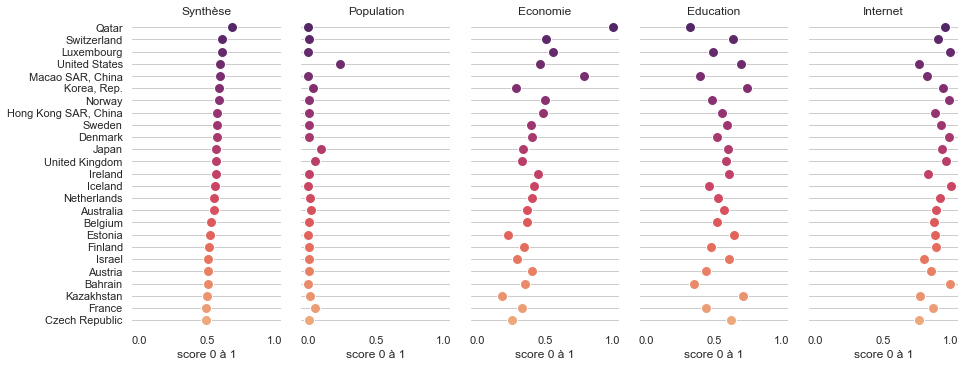

In [166]:
# Jeu de données final retenu (iloc[:taille] à la fin pour retenir uniquement le nombre de pays souhaité)
data_scoring = data_scoring.sort_values('SCORE_SYNTH', ascending=False)[['Country Name', 'SCORE_SYNTH', 'SCORE_POP', 'SCORE_ECO', 'SCORE_EDU', 'SCORE_WEB']].iloc[:taille]

# Make the PairGrid
g = sns.PairGrid(data_scoring.sort_values("SCORE_SYNTH", ascending=False),
                 x_vars=data_scoring.columns[1:6], y_vars=["Country Name"],
                 height=5, aspect=0.5)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(-0.05, 1.05), xlabel="score 0 à 1", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Synthèse", "Population", "Economie",
          "Education", "Internet"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

# 7 | Quelques indicateurs statistiques

## 7.1 Boxplots sur pays du top 5 et blocs géographiques

### Préparation des listes pour le boxplot multiple et ajustement du jeu de données 'data_raw' :

In [167]:
final_indicators = data_raw[data_raw["Indicator Name"].isin(["Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary",\
"Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary",\
"Population, total", "Internet users (per 100 people)",\
"GNI per capita, PPP (current international $)"])]["Indicator Code"].unique()

In [168]:
final_indicators

array(['BAR.SEC.CMPT.15UP.ZS', 'BAR.TER.CMPT.15UP.ZS',
       'NY.GNP.PCAP.PP.CD', 'IT.NET.USER.P2', 'SP.POP.TOTL'], dtype=object)

In [169]:
country_top_five

Index(['Qatar', 'Switzerland', 'Luxembourg', 'United States',
       'Macao SAR, China'],
      dtype='object', name='Country Name')

In [170]:
regions = data_raw.Region.unique()

In [171]:
# On supprime le nan au début de l'array' :
regions = np.delete(regions,0)
regions

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [172]:
# On ne garde que les indicateurs finalement retenus :
data_raw = data_raw.loc[data_raw['Indicator Code'].isin(final_indicators), :]

In [173]:
data_raw_region = data_raw.loc[data_raw['Region'].isnull(), :]

In [174]:
data_raw_country = data_raw.loc[~data_raw['Region'].isnull(), :]

### Boxplot multiples par indicateur et région, base 'data_raw_region' :

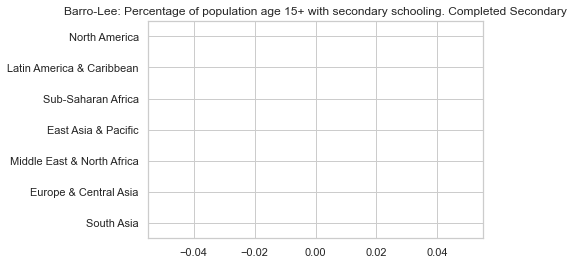

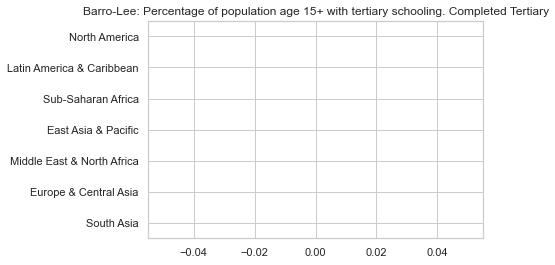

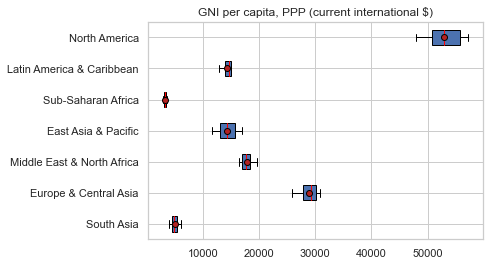

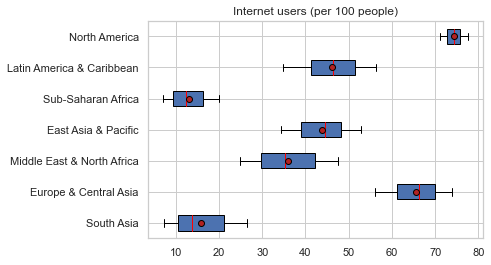

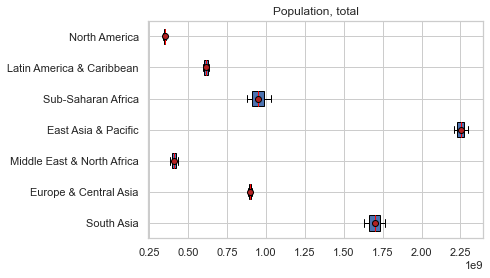

In [175]:
X = regions.ravel() # qualitative
Y = final_indicators

modalites = X

for y in Y:
    groupes = []
    for m in modalites:
        mask = (data_raw_region["Country Name"] == m) & (data_raw_region["Indicator Code"] == y)
        values_all = data_raw_region.loc[mask,"2010":"2050"].values.ravel()
        values_final = values_all[~np.isnan(values_all)]
        groupes.append([pd.Series(values_final)])
    groupes = pd.Series(groupes)

    title = data_raw_region[data_raw_region["Indicator Code"] == y]["Indicator Name"].unique().tolist()[0]

    #créer la figure et les axes :
    fig, ax = plt.subplots()
    ax.set_title(title)

    # Propriétés graphiques (couleur médiane & moyenne) :
    medianprops = {'color':"red"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}

    # Traçage du boxplot :
    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
               vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

    plt.show()

### Boxplot multiples par indicateur et country, base 'data_raw_country' :

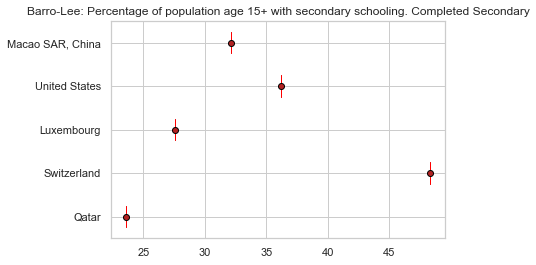

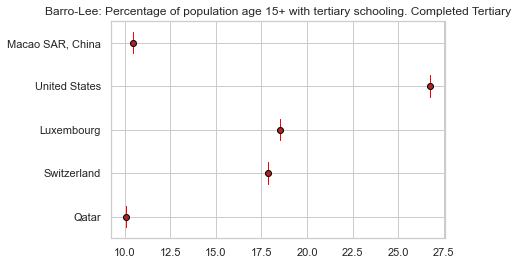

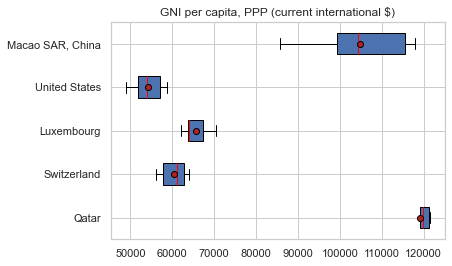

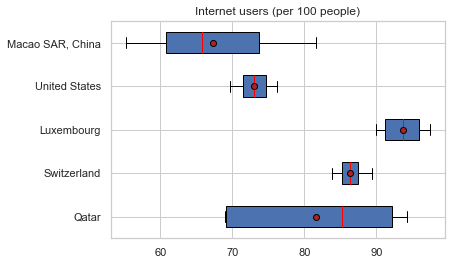

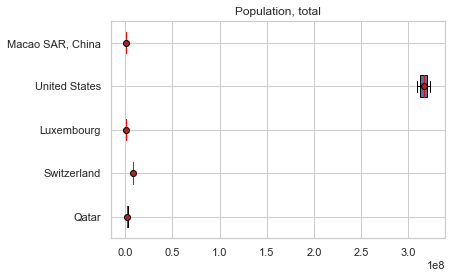

In [176]:
X = country_top_five.ravel() # qualitative
Y = final_indicators

modalites = X

for y in Y:
    groupes = []
    for m in modalites:
        mask = (data_raw_country["Country Name"] == m) & (data_raw_country["Indicator Code"] == y)
        values_all = data_raw_country.loc[mask,"2010":"2050"].values.ravel()
        values_final = values_all[~np.isnan(values_all)]
        groupes.append([pd.Series(values_final)])
    groupes = pd.Series(groupes)

    title = data_raw_country[data_raw_country["Indicator Code"] == y]["Indicator Name"].unique().tolist()[0]

    #créer la figure et les axes :
    fig, ax = plt.subplots()
    ax.set_title(title)

    # Propriétés graphiques (couleur médiane & moyenne) :
    medianprops = {'color':"red"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}

    # Traçage du boxplot :
    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,
               vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

    plt.show()

## 7.2 Graphique radar sur les régions et indicateurs retenus au scoring

### Sélection des indicateurs de 'data_agg' et renommage des colonnes pour plus de lisibilité

In [177]:
data_agg.columns

Index(['Region',
       'Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary',
       'Enrolment in tertiary education per 100,000 inhabitants, both sexes',
       'GNI per capita, PPP (current international $)',
       'Internet users (per 100 people)',
       'Barro-Lee: Population in thousands, age 15+, total',
       'Enrolment in upper secondary education, both sexes (number)',
       'Population, total',
       'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Target Pop, current, in thousands', 'Target Pop, 2050, in thousands',
       'Target Pop evol %'],
      dtype='object', name='Indicator Name')

In [178]:
my_columns=["Region","Enrolment in upper secondary education, both sexes (number)","Internet users (per 100 people)",\
        "GNI per capita, PPP (current international $)","Population, total",\
        "Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary"]

In [179]:
data_agg=data_agg[my_columns]

In [180]:
data_agg.columns = ["Region", "Lyceens", "Internet", "Revenu","Population","Bacheliers"] 

In [181]:
data_agg.head(3)

,Region,Lyceens,Internet,Revenu,Population,Bacheliers
0,East Asia & Pacific,6.736084e+07,48.970507,22282.000000,2.273265e+09,27.24619
1,Europe & Central...,3.569441e+07,74.319663,29335.918367,9.119609e+08,43.60175
2,Latin America & ...,2.510107e+07,55.996939,14420.000000,6.376263e+08,26.04560


### Création du jeu de données 'data_agg_radar'

In [182]:
data_agg

,Region,Lyceens,Internet,Revenu,Population,Bacheliers
0,East Asia & Pacific,6.736084e+07,48.970507,22282.000000,2.273265e+09,27.246190
1,Europe & Central...,3.569441e+07,74.319663,29335.918367,9.119609e+08,43.601750
2,Latin America & ...,2.510107e+07,55.996939,14420.000000,6.376263e+08,26.045600
3,Middle East & No...,1.410853e+07,57.957443,34131.111111,4.367207e+08,22.734118
4,North America,1.326990e+07,88.005579,56263.333333,3.594793e+08,33.990000
5,South Asia,6.943001e+07,28.313673,7200.000000,1.766383e+09,17.091429
6,Sub-Saharan Africa,1.867425e+07,20.312099,4892.765957,1.031692e+09,12.354375


In [183]:
data_agg_radar = data_agg
data_agg_radar

,Region,Lyceens,Internet,Revenu,Population,Bacheliers
0,East Asia & Pacific,6.736084e+07,48.970507,22282.000000,2.273265e+09,27.246190
1,Europe & Central...,3.569441e+07,74.319663,29335.918367,9.119609e+08,43.601750
2,Latin America & ...,2.510107e+07,55.996939,14420.000000,6.376263e+08,26.045600
3,Middle East & No...,1.410853e+07,57.957443,34131.111111,4.367207e+08,22.734118
4,North America,1.326990e+07,88.005579,56263.333333,3.594793e+08,33.990000
5,South Asia,6.943001e+07,28.313673,7200.000000,1.766383e+09,17.091429
6,Sub-Saharan Africa,1.867425e+07,20.312099,4892.765957,1.031692e+09,12.354375


In [184]:
data_agg_radar.columns

Index(['Region', 'Lyceens', 'Internet', 'Revenu', 'Population', 'Bacheliers'], dtype='object')

### Ajout d'une ligne "à vide" pour fixer le point zéro de chaque série avant de faire une mise à l'échelle

In [185]:
data_agg_radar.loc[7]=['Reference_Min', 0, 0, 0, 0, 0]

In [186]:
data_agg_radar

,Region,Lyceens,Internet,Revenu,Population,Bacheliers
0,East Asia & Pacific,6.736084e+07,48.970507,22282.000000,2.273265e+09,27.246190
1,Europe & Central...,3.569441e+07,74.319663,29335.918367,9.119609e+08,43.601750
2,Latin America & ...,2.510107e+07,55.996939,14420.000000,6.376263e+08,26.045600
3,Middle East & No...,1.410853e+07,57.957443,34131.111111,4.367207e+08,22.734118
4,North America,1.326990e+07,88.005579,56263.333333,3.594793e+08,33.990000
5,South Asia,6.943001e+07,28.313673,7200.000000,1.766383e+09,17.091429
6,Sub-Saharan Africa,1.867425e+07,20.312099,4892.765957,1.031692e+09,12.354375
7,Reference_Min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000


In [187]:
data_agg_radar.count()

Region        8
Lyceens       8
Internet      8
Revenu        8
Population    8
Bacheliers    8
dtype: int64

### Alignement les valeurs de chaque indicateur sur une même échelle et rectification du jeu de données

In [188]:
# Les attributs à positionner sur le graphique radar.
labels = ['Lyceens', 'Internet', 'Revenu', 'Population', 'Bacheliers']

# Nombre de variables positionnées.
num_vars = len(labels)

# Nouvelle échelle de 0 à 100 pour chaque indicateur.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Transformation linéaire sur chaque variable pour modifier la valeur
# en [0, 100].
for factor in labels:
    max_val = data_agg_radar[factor].max()
    min_val = data_agg_radar[factor].min()
    val_range = max_val - min_val
    data_agg_radar[factor + '_Adj'] = data_agg_radar[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)
    

# Réduire aux colonnes souhaitées et les renommer.
data_agg_radar = data_agg_radar.loc[:, ['Region', 'Lyceens_Adj', 
                                        'Internet_Adj', 'Revenu_Adj',
                                        'Population_Adj', 'Bacheliers_Adj']]

data_agg_radar.rename(columns={
    'Lyceens_Adj': 'Lyceens',
    'Internet_Adj': 'Internet',
    'Revenu_Adj': 'Revenu',
    'Population_Adj': 'Population',
    'Bacheliers_Adj': 'Bacheliers'
}, inplace=True)

data_agg_radar.set_index('Region', inplace=True)

Données rectifiées de 0 à 100 pour bien visualiser les différences entre régions :

In [189]:
data_agg_radar

,Lyceens,Internet,Revenu,Population,Bacheliers
Region,,,,,
East Asia & Pacific,97.019767,55.644775,39.603057,100.000000,62.488754
Europe & Central Asia,51.410632,84.448809,52.140385,40.116785,100.000000
Latin America & Caribbean,36.153048,63.628851,25.629480,28.048920,59.735217
Middle East & North Africa,20.320506,65.856556,60.663151,19.211165,52.140379
North America,19.112622,100.000000,100.000000,15.813345,77.955587
South Asia,100.000000,32.172589,12.796967,77.702482,39.198951
Sub-Saharan Africa,26.896510,23.080467,8.696189,45.383690,28.334585
Reference_Min,0.000000,0.000000,0.000000,0.000000,0.000000


### Construction du graphique en radar avec ces données à l'aide de la bibliothèque matplotlib

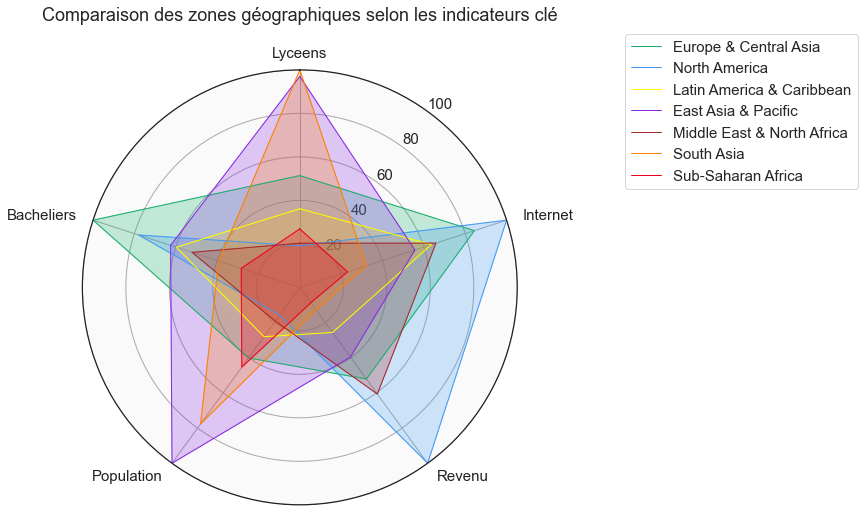

In [190]:
# On fixe la taille du texte (le titre sera relativement 1,2 fois plus grand)
fsize = 15

# Division du cercle en parties égales et mémorisation des angles
# pour savoir où mettre chaque axe.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Le graphe est un cercle, nous allons donc compléter la boucle.
# et ajouter la valeur de départ à la fin.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Fonction pour positionner chaque élément sur le graphe radar.
def add_to_radar(country_name, color):
    values = data_agg_radar.loc[country_name].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=country_name)
    ax.fill(angles, values, color=color, alpha=0.25)

# Ajouter chaque élément au graphique.
add_to_radar('Europe & Central Asia', '#1aaf6c') # vert
add_to_radar('North America', '#429bf4') # bleu
add_to_radar('Latin America & Caribbean', '#FFFF00') # jaune (ex d42cea rose) 
add_to_radar('East Asia & Pacific', '#8a2be2') # bleu violet
add_to_radar('Middle East & North Africa', '#a52a2a') # marron
add_to_radar('South Asia', '#ff7f00') # orange
add_to_radar('Sub-Saharan Africa', '#f00020') # rouge


# Fixer l'axe pour aller dans le bon sens et commencer à midi.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Dessiner les lignes des axes pour chaque angle et étiquettes.
ax.set_thetagrids(np.degrees(angles[0:-1]), labels)

# Boucler sur les labels et ajuster l'alignement selon l'endroit
# où il est positionné sur le cercle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# S'assurer que le radar va de 0 à 100.
ax.set_ylim(0, 100)
# On peut aussi fixer manuellement les limites ainsi:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Fixer la position des labels y (0-100) pour qu'ils soient au milieu
# des deux premiers axes.
ax.set_rlabel_position(180 / num_vars)


# Fixer la taille des intitulés
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(fsize)

# Ajout de styles customisés.
# Changer la couleur des étiquettes.
ax.tick_params(colors='#222222')
# Ajuster la taille des étiquettes y (0-100).
ax.tick_params(axis='y', labelsize = fsize)
# Modifier la couleur des grilles circulaires.
ax.grid(color='#AAAAAA')
# Modifier la couleur de la ligne externe (le contour).
ax.spines['polar'].set_color('#222222')
# Modifier la couleur de fond à l'intérieur du cercle.
ax.set_facecolor('#FAFAFA')

# Ajout d'un titre.
ax.set_title('Comparaison des zones géographiques selon les indicateurs clé', y=1.1, fontsize = round(fsize*1.2,0))

# Ajout d'une légende.
ax.legend(loc='upper right', bbox_to_anchor=(1.8, 1.1), prop={"size":fsize})
plt.show()

## 7.3 Mesure des corrélations et cartes de chaleur

### 7.3.1 Mesure des corrélations (Pearson) observées sur 'data_agg' et carte de chaleur (régions)

Corrélations >= 0,9 observées entre :
-  Population et Lycéens (0.93)
-  Revenu et Internet (0.9)

Corrélation >= 0,6 observées entre :
-  Bacheliers et Internet (0.87)
-  Revenu et Bacheliers (0.65)

Dans l'ensemble ces corrélations ne semblent pas exploitables en l'état.<br>
Le jeu de données est peut-être à retraiter avant toute analyse de ce type : Il est par exemple étrange que lycéens et internet soient corrélés négativement, etc...

#### Describe et matrice des corrélations

In [191]:
data_agg.describe()

,Lyceens,Internet,Revenu,Population,Bacheliers,Lyceens_Adj,Internet_Adj,Revenu_Adj,Population_Adj,Bacheliers_Adj
count,8.000000e+00,8.000000,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.045487e+07,46.734488,21065.641096,9.271409e+08,22.882933,43.864136,53.104006,37.441154,40.784549,52.481684
std,2.553999e+07,29.038334,18598.021148,7.591067e+08,13.361563,36.785225,32.996015,33.055313,33.392790,30.644557
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.389887e+07,26.313280,6623.191489,4.174104e+08,15.907165,20.018535,29.899559,11.771772,18.361710,36.482859
50%,2.188766e+07,52.483723,18351.000000,7.747936e+08,24.389859,31.524779,59.636813,32.616269,34.082853,55.937798
75%,4.361102e+07,62.047998,30534.716553,1.215365e+09,28.932143,62.812916,70.504619,54.271076,53.463388,66.355462
max,6.943001e+07,88.005579,56263.333333,2.273265e+09,43.601750,100.000000,100.000000,100.000000,100.000000,100.000000


In [192]:
corr_data_agg_1 = data_agg.corr().copy()
print("La matrice des corrélations : \n")
print(corr_data_agg_1, "\n")

La matrice des corrélations : 

                 Lyceens  Internet    Revenu  Population  Bacheliers  \
Lyceens         1.000000  0.058053 -0.121198    0.947854    0.276048   
Internet        0.058053  1.000000  0.908853   -0.025372    0.928433   
Revenu         -0.121198  0.908853  1.000000   -0.169479    0.734274   
Population      0.947854 -0.025372 -0.169479    1.000000    0.192475   
Bacheliers      0.276048  0.928433  0.734274    0.192475    1.000000   
Lyceens_Adj     1.000000  0.058053 -0.121198    0.947854    0.276048   
Internet_Adj    0.058053  1.000000  0.908853   -0.025372    0.928433   
Revenu_Adj     -0.121198  0.908853  1.000000   -0.169479    0.734274   
Population_Adj  0.947854 -0.025372 -0.169479    1.000000    0.192475   
Bacheliers_Adj  0.276048  0.928433  0.734274    0.192475    1.000000   

                Lyceens_Adj  Internet_Adj  Revenu_Adj  Population_Adj  \
Lyceens            1.000000      0.058053   -0.121198        0.947854   
Internet           0.058053  

#### Carte de chaleur des corrélations

La carte de chaleur des corrélations :


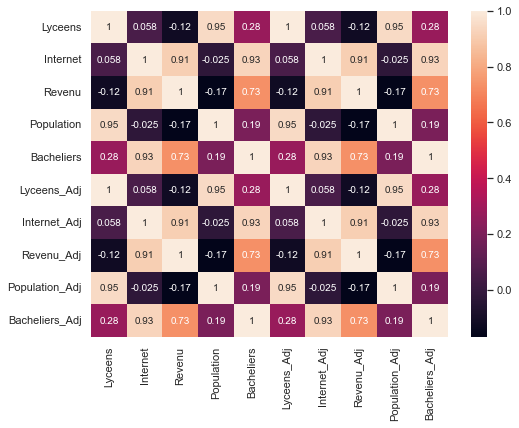

In [193]:
corr_data_agg_2 = data_agg.corr(method='pearson').copy()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data_agg_2, annot=True)
print("La carte de chaleur des corrélations :")
plt.show()

### 7.3.2 Mesure des corrélations (Pearson) observées sur 'data_pays' et carte de chaleur (pays)

L'analyse par pays montre les corrélations remarquables suivantes :
-  0.77 entre Internet et Economie
-  0.65 entre Internet et Education_1
-  0.52 entre Internet et Education_2
-  -0.62 entre Target Pop evol % et Education_2

La taille de la population ne semble pas non plus corrélée avec les autres indicateurs

#### Describe et matrice des corrélations

In [194]:
data_pays.describe()

,Education_1,Education_2,Population,Internet,Economie,"Target Pop, current, in thousands","Target Pop, 2050, in thousands",Target Pop evol %
count,97.000000,97.000000,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000
mean,9.412680,30.659175,6.112377e+07,59.242567,25425.979381,6333.446728,10725.574977,177.615464
std,7.368958,15.915403,1.964358e+08,26.703741,22827.579339,16834.747029,26822.382822,278.659256
min,0.000000,3.380000,3.342520e+05,4.322758,710.000000,9.628134,21.926807,-46.600000
25%,3.260000,18.860000,4.613823e+06,34.666001,7950.000000,292.944631,694.611000,24.700000
50%,7.760000,29.050000,1.064879e+07,62.302193,21020.000000,1355.295999,2180.268119,89.800000
75%,14.960000,40.810000,4.384743e+07,79.889371,37330.000000,5538.410002,11275.066081,180.500000
max,30.040000,68.770000,1.378665e+09,98.240016,125000.000000,132586.822466,166534.310424,1429.800000


In [195]:
corr_data_scoring_1 = data_pays.corr().copy()
print("La matrice des corrélations : \n")
print(corr_data_scoring_1, "\n")

La matrice des corrélations : 

                      Education_1  Education_2  Population  Internet  \
Education_1              1.000000     0.394422   -0.078251  0.650245   
Education_2              0.394422     1.000000   -0.085510  0.515987   
Population              -0.078251    -0.085510    1.000000 -0.121603   
Internet                 0.650245     0.515987   -0.121603  1.000000   
Economie                 0.496762     0.271459   -0.108000  0.771852   
Target Pop, curre...     0.101852     0.038437    0.873997  0.064352   
Target Pop, 2050,...     0.073841    -0.021579    0.928238 -0.009585   
Target Pop evol %       -0.412498    -0.616720   -0.059952 -0.495858   

                      Economie  Target Pop, current, in thousands  \
Education_1           0.496762             0.101852                 
Education_2           0.271459             0.038437                 
Population           -0.108000             0.873997                 
Internet              0.771852             

#### Carte de chaleur des corrélations

La carte de chaleur des corrélations :


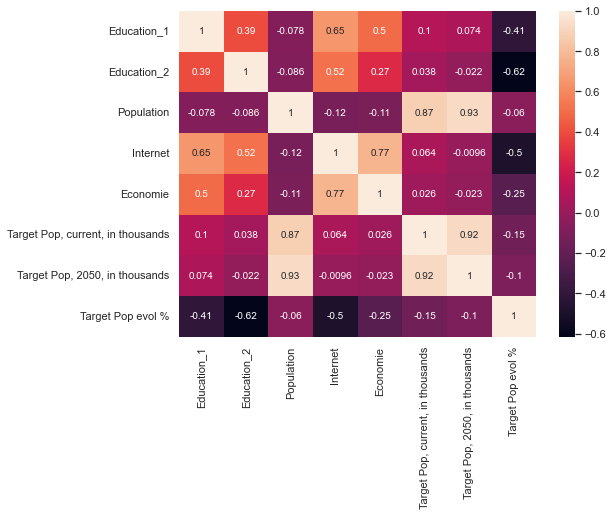

In [196]:
corr_data_scoring_2 = data_pays.corr(method='pearson').copy()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data_scoring_2, annot=True)
print("La carte de chaleur des corrélations :")
plt.show()